# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<h1>План исследования<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Чтение-файла-с-данными-и-изучение-общей-информации" data-toc-modified-id="Чтение-файла-с-данными-и-изучение-общей-информации-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Чтение файла с данными и изучение общей информации</a></span><ul class="toc-item"><li><span><a href="#Описание-данных:" data-toc-modified-id="Описание-данных:-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Описание данных:</a></span></li><li><span><a href="#Выводы-по-разделу" data-toc-modified-id="Выводы-по-разделу-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Выводы по разделу</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Пропуски-значений-и-ошибки-данных" data-toc-modified-id="Пропуски-значений-и-ошибки-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Пропуски значений и ошибки данных</a></span><ul class="toc-item"><li><span><a href="#Первичная-общая-предобработка." data-toc-modified-id="Первичная-общая-предобработка.-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Первичная общая предобработка.</a></span></li><li><span><a href="#Заполнение-пропусков-в-колонке-'ceiling_height'." data-toc-modified-id="Заполнение-пропусков-в-колонке-'ceiling_height'.-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Заполнение пропусков в колонке <code>'ceiling_height'</code>.</a></span></li><li><span><a href="#Заполнение-пропусков-в-колонке-'living_area'." data-toc-modified-id="Заполнение-пропусков-в-колонке-'living_area'.-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Заполнение пропусков в колонке <code>'living_area'</code>.</a></span></li><li><span><a href="#Заполнение-пропусков-в-колонке-'kitchen_area'." data-toc-modified-id="Заполнение-пропусков-в-колонке-'kitchen_area'.-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>Заполнение пропусков в колонке <code>'kitchen_area'</code>.</a></span></li><li><span><a href="#Заполнение-пропусков-в-колонке-'balcony'." data-toc-modified-id="Заполнение-пропусков-в-колонке-'balcony'.-2.1.5"><span class="toc-item-num">2.1.5&nbsp;&nbsp;</span>Заполнение пропусков в колонке <code>'balcony'</code>.</a></span></li><li><span><a href="#Заполнение-пропусков-в-колонках-'floors_total'-и-'locality_name'." data-toc-modified-id="Заполнение-пропусков-в-колонках-'floors_total'-и-'locality_name'.-2.1.6"><span class="toc-item-num">2.1.6&nbsp;&nbsp;</span>Заполнение пропусков в колонках <code>'floors_total'</code> и <code>'locality_name'</code>.</a></span></li><li><span><a href="#Анализ-неявных-дубликатов-в-колонке-'locality_name'." data-toc-modified-id="Анализ-неявных-дубликатов-в-колонке-'locality_name'.-2.1.7"><span class="toc-item-num">2.1.7&nbsp;&nbsp;</span>Анализ неявных дубликатов в колонке <code>'locality_name'</code>.</a></span></li><li><span><a href="#Заполнение-пропусков-в-колонках-с-картографическими-данными." data-toc-modified-id="Заполнение-пропусков-в-колонках-с-картографическими-данными.-2.1.8"><span class="toc-item-num">2.1.8&nbsp;&nbsp;</span>Заполнение пропусков в колонках с картографическими данными.</a></span></li><li><span><a href="#Заполнение-колонки-days_exposition-—-сколько-дней-было-размещено-объявление-(от-публикации-до-снятия)." data-toc-modified-id="Заполнение-колонки-days_exposition-—-сколько-дней-было-размещено-объявление-(от-публикации-до-снятия).-2.1.9"><span class="toc-item-num">2.1.9&nbsp;&nbsp;</span>Заполнение колонки <code>days_exposition</code> — сколько дней было размещено объявление (от публикации до снятия).</a></span></li><li><span><a href="#Аномалии-в-столбце-'last_price'." data-toc-modified-id="Аномалии-в-столбце-'last_price'.-2.1.10"><span class="toc-item-num">2.1.10&nbsp;&nbsp;</span>Аномалии в столбце <code>'last_price'</code>.</a></span></li><li><span><a href="#Преобразование-типов-колонок." data-toc-modified-id="Преобразование-типов-колонок.-2.1.11"><span class="toc-item-num">2.1.11&nbsp;&nbsp;</span>Преобразование типов колонок.</a></span></li></ul></li><li><span><a href="#Выводы-по-разделу" data-toc-modified-id="Выводы-по-разделу-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Выводы по разделу</a></span></li></ul></li><li><span><a href="#Добавление-в-таблицу-новых-столбцов" data-toc-modified-id="Добавление-в-таблицу-новых-столбцов-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Добавление в таблицу новых столбцов</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изучение-параметров-объектов" data-toc-modified-id="Изучение-параметров-объектов-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Изучение параметров объектов</a></span><ul class="toc-item"><li><span><a href="#Параметр-&quot;Общая-площадь&quot;." data-toc-modified-id="Параметр-&quot;Общая-площадь&quot;.-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Параметр "Общая площадь".</a></span></li><li><span><a href="#Параметр-&quot;Жилая-площадь&quot;." data-toc-modified-id="Параметр-&quot;Жилая-площадь&quot;.-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Параметр "Жилая площадь".</a></span></li><li><span><a href="#Параметр-&quot;Площадь-кухни&quot;." data-toc-modified-id="Параметр-&quot;Площадь-кухни&quot;.-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span>Параметр "Площадь кухни".</a></span></li><li><span><a href="#Параметр-&quot;Цена-объекта&quot;." data-toc-modified-id="Параметр-&quot;Цена-объекта&quot;.-4.1.4"><span class="toc-item-num">4.1.4&nbsp;&nbsp;</span>Параметр "Цена объекта".</a></span></li><li><span><a href="#Параметр-&quot;Количество-комнат&quot;." data-toc-modified-id="Параметр-&quot;Количество-комнат&quot;.-4.1.5"><span class="toc-item-num">4.1.5&nbsp;&nbsp;</span>Параметр "Количество комнат".</a></span></li><li><span><a href="#Параметр-&quot;Высота-потолков&quot;." data-toc-modified-id="Параметр-&quot;Высота-потолков&quot;.-4.1.6"><span class="toc-item-num">4.1.6&nbsp;&nbsp;</span>Параметр "Высота потолков".</a></span></li><li><span><a href="#Параметр-&quot;Этаж-квартиры&quot;." data-toc-modified-id="Параметр-&quot;Этаж-квартиры&quot;.-4.1.7"><span class="toc-item-num">4.1.7&nbsp;&nbsp;</span>Параметр "Этаж квартиры".</a></span></li><li><span><a href="#Параметр-&quot;Тип-этажа-квартиры&quot;." data-toc-modified-id="Параметр-&quot;Тип-этажа-квартиры&quot;.-4.1.8"><span class="toc-item-num">4.1.8&nbsp;&nbsp;</span>Параметр "Тип этажа квартиры".</a></span></li><li><span><a href="#Параметр-&quot;Общее-количество-этажей-в-доме&quot;." data-toc-modified-id="Параметр-&quot;Общее-количество-этажей-в-доме&quot;.-4.1.9"><span class="toc-item-num">4.1.9&nbsp;&nbsp;</span>Параметр "Общее количество этажей в доме".</a></span></li><li><span><a href="#Параметр-&quot;Расстояние-до-центра-города-в-метрах&quot;." data-toc-modified-id="Параметр-&quot;Расстояние-до-центра-города-в-метрах&quot;.-4.1.10"><span class="toc-item-num">4.1.10&nbsp;&nbsp;</span>Параметр "Расстояние до центра города в метрах".</a></span></li><li><span><a href="#Параметр-&quot;Расстояние-до-ближайшего-аэропорта&quot;." data-toc-modified-id="Параметр-&quot;Расстояние-до-ближайшего-аэропорта&quot;.-4.1.11"><span class="toc-item-num">4.1.11&nbsp;&nbsp;</span>Параметр "Расстояние до ближайшего аэропорта".</a></span></li><li><span><a href="#Параметр-&quot;Расстояние-до-ближайшего-парка&quot;." data-toc-modified-id="Параметр-&quot;Расстояние-до-ближайшего-парка&quot;.-4.1.12"><span class="toc-item-num">4.1.12&nbsp;&nbsp;</span>Параметр "Расстояние до ближайшего парка".</a></span></li><li><span><a href="#Параметр-&quot;День,-месяц,-год-публикации-объявления&quot;." data-toc-modified-id="Параметр-&quot;День,-месяц,-год-публикации-объявления&quot;.-4.1.13"><span class="toc-item-num">4.1.13&nbsp;&nbsp;</span>Параметр "День, месяц, год публикации объявления".</a></span></li></ul></li><li><span><a href="#Изучение-скорости-продажи-квартир" data-toc-modified-id="Изучение-скорости-продажи-квартир-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Изучение скорости продажи квартир</a></span></li><li><span><a href="#Изучение-факторов,-влияющих-на-стоимость-квартиры" data-toc-modified-id="Изучение-факторов,-влияющих-на-стоимость-квартиры-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Изучение факторов, влияющих на стоимость квартиры</a></span></li><li><span><a href="#Сравнение-средней-стоимости-одного-квадратного-метра-в-топ-10-населённых-пунктов" data-toc-modified-id="Сравнение-средней-стоимости-одного-квадратного-метра-в-топ-10-населённых-пунктов-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Сравнение средней стоимости одного квадратного метра в топ-10 населённых пунктов</a></span></li><li><span><a href="#Влияние-расстояния-до-центра-города-на-стоимость-объектов-недвижимости" data-toc-modified-id="Влияние-расстояния-до-центра-города-на-стоимость-объектов-недвижимости-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Влияние расстояния до центра города на стоимость объектов недвижимости</a></span></li><li><span><a href="#Выводы-по-разделу-4" data-toc-modified-id="Выводы-по-разделу-4-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Выводы по разделу 4</a></span></li></ul></li><li><span><a href="#Общий-вывод-исследования" data-toc-modified-id="Общий-вывод-исследования-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод исследования</a></span></li></ul></div>

In [1]:
# импортируем необходимые для проведения исследования библиотеки

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

sns.set(font_scale=2,
        style='whitegrid',
        rc={'figure.figsize': (16, 8)})

## Чтение файла с данными и изучение общей информации

Прочитаем файл и попробуем вывести первые 5 строк.

In [2]:
try:
    data = pd.read_csv('real_estate_data.csv')
except:    
    data = pd.read_csv('/datasets/real_estate_data.csv')
    
data.head()

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...


Замечено, что столбцы таблицы разделены символом табуляции, поэтому для адекватного отображения данных пропишем его в параметре sep и снова посмотрим на результат.

In [3]:
try:
    data = pd.read_csv('real_estate_data.csv', sep='\t')
except:    
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


Выведем для наглядности на экран пять случайных строк.

In [4]:
data.sample(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
15494,16,10665000.0,71.25,2018-08-04T00:00:00,2,2.75,20.0,NaN,8,NaN,...,15.3,2.0,Санкт-Петербург,39357.0,10581.0,2.0,288.0,3.0,311.0,90.0
22438,18,2980000.0,41.00,2018-10-09T00:00:00,2,NaN,5.0,26.6,1,NaN,...,5.0,NaN,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,128.0
4824,6,2870000.0,46.30,2018-09-12T00:00:00,2,2.50,5.0,29.0,3,NaN,...,6.5,1.0,Кировск,NaN,NaN,NaN,NaN,NaN,NaN,124.0
23389,6,2850000.0,40.00,2015-01-26T00:00:00,1,2.60,10.0,19.0,8,False,...,9.0,2.0,поселок Бугры,NaN,NaN,NaN,NaN,NaN,NaN,1012.0
1082,9,4370000.0,43.00,2016-04-22T00:00:00,1,NaN,5.0,18.5,3,NaN,...,NaN,0.0,Санкт-Петербург,39945.0,15228.0,0.0,NaN,1.0,888.0,137.0


### Описание данных:

В таблице 22 столбцa. Тип данных в столбцах —`bool`, `object`, `int64` и `float64`.

- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

Выведем общую информацию о датафрейме и распределение всех числовых столбцов, чтобы оценить размер, типы данных, минимальные/максимальные/медианные значения и прочие описательные статистики.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [6]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Для наглядности оценим визуально распределение случайных величин с помощью гистограмм.

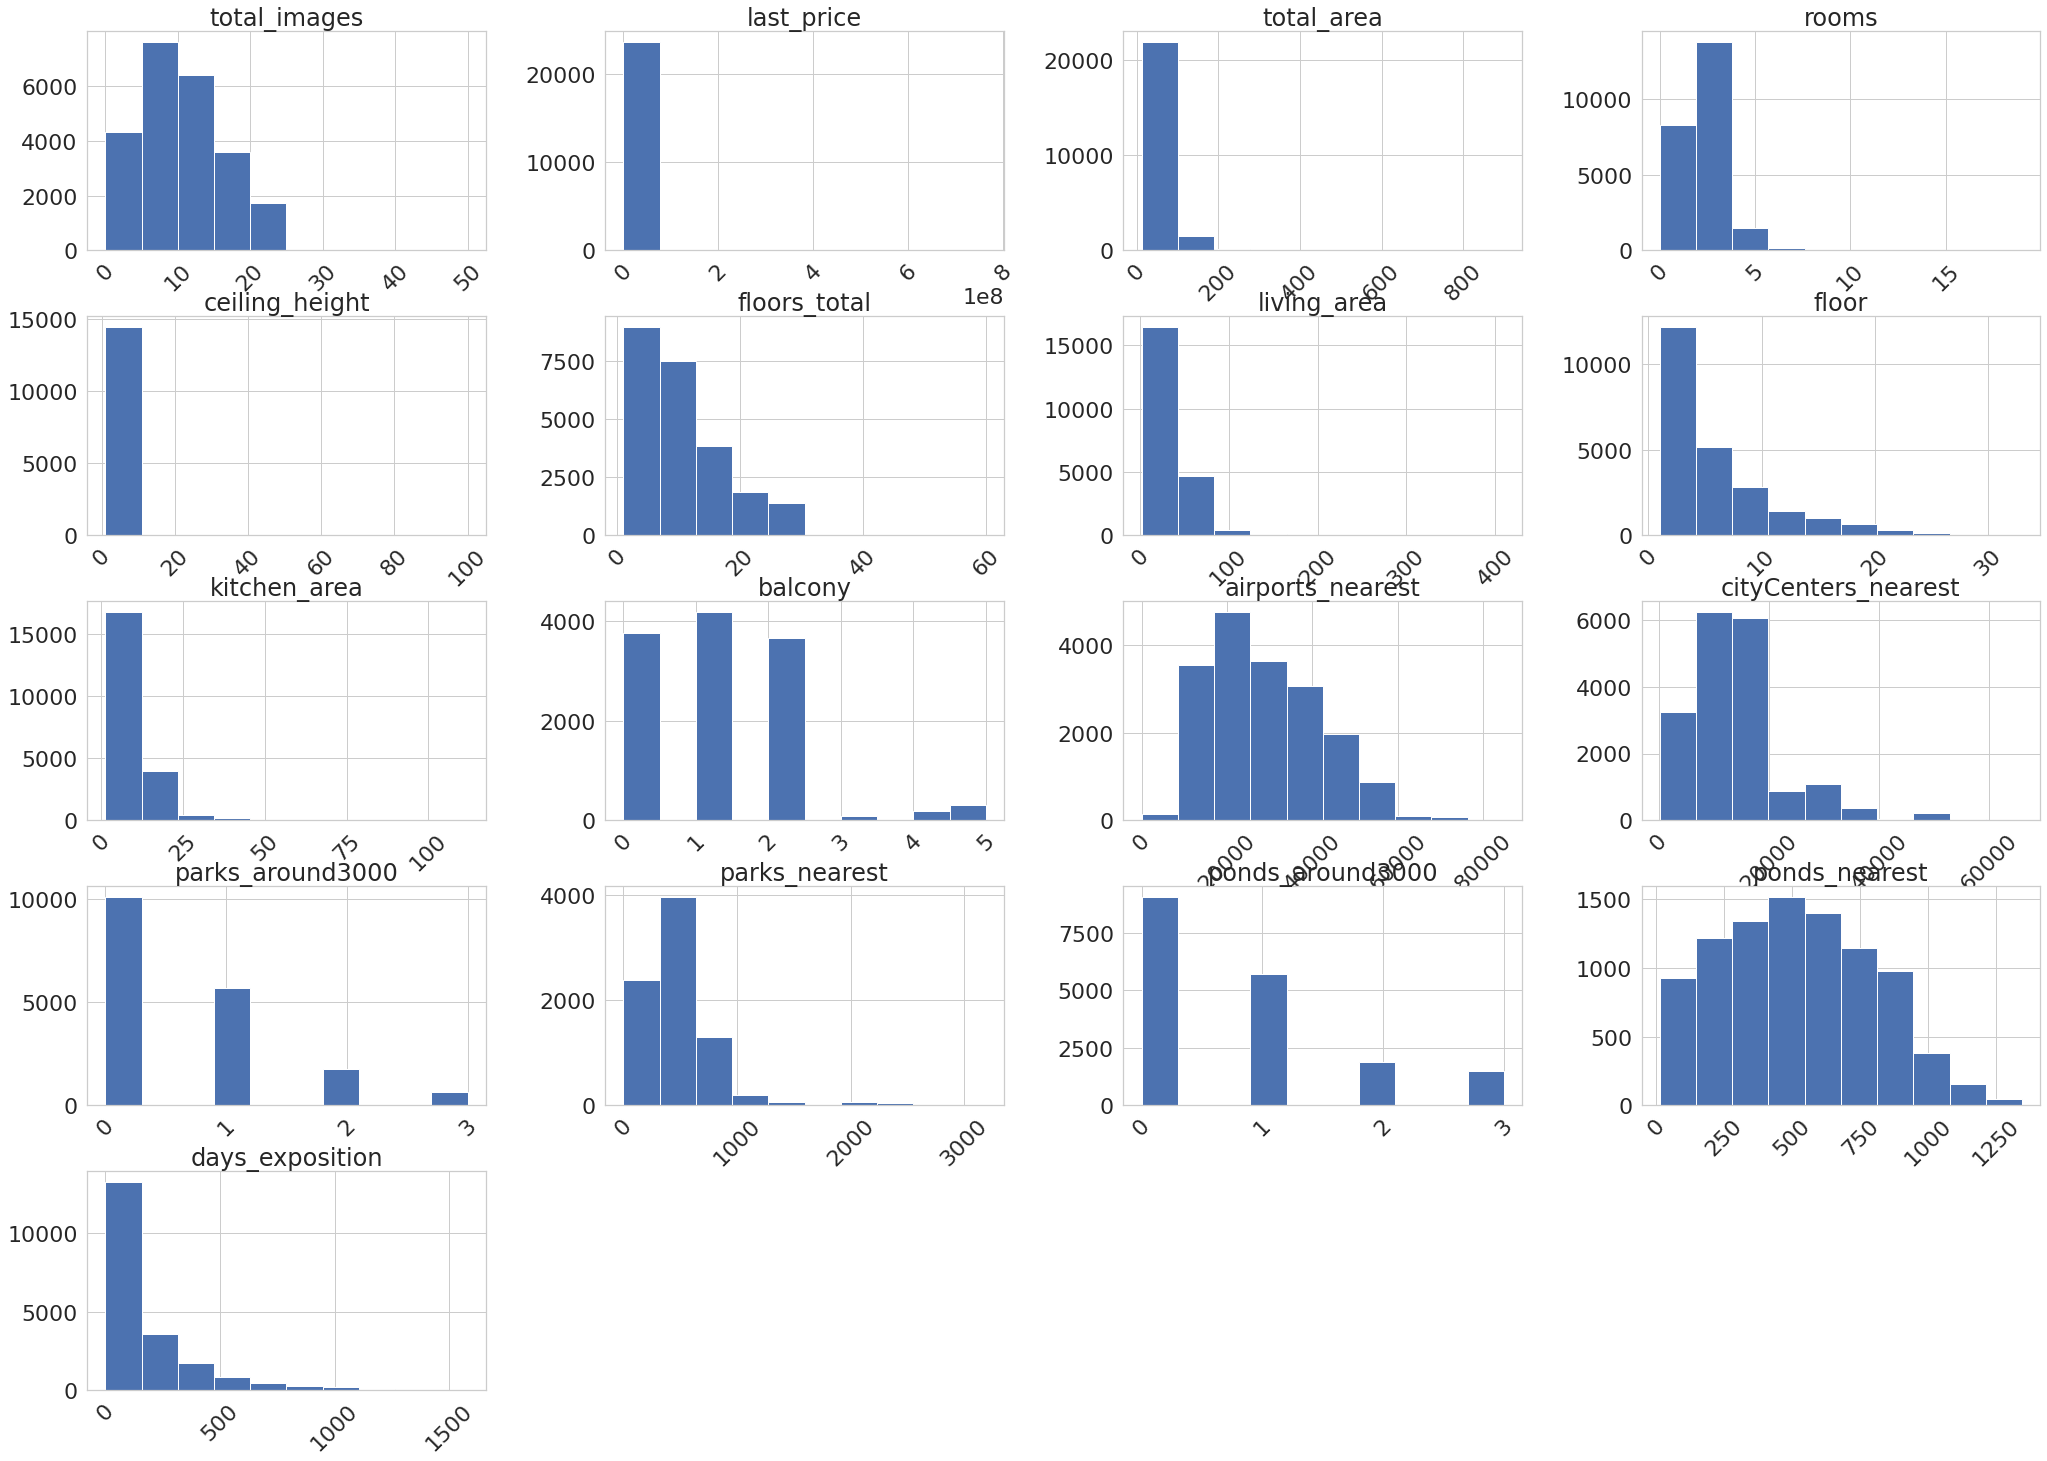

In [7]:
data.hist(figsize=(35, 25), xrot=45);

Наш датафрейм с объектами недвижимости содержит 23699 записи и 22 колонки. В каждой строке таблицы — данные о конкретном объекте недвижимости, выставленном на продажу. 
По каждому объекту доступны два вида данных: 
    
- вписаные пользователем самостоятельно, 
- полученные автоматически на основе картографических данных (например, расстояние до центра, аэропорта, ближайшего парка и водоёма).

Признаки наших объектов имеют следующие типы данных:
    
- 3 типа int,
- 14 типа float,
- 3 типа object,
- 2 типа bool.

Видно явное несоотвествие типов, необходимо перевести :

в формат int из формата float:

- last_price
- floors_total
- balcony
- parks_around3000
- ponds_around3000
- days_exposition

в формат bool из формата object:
- is_apartment

в формат даты из формата object:
- first_day_exposition

Для целого ряда столбцов есть пропущенные значения и некорректный тип данных. 

Возможно имеют место технические ошибки при выгрузке, либо выгрузка из нескольких источников, либо просто бессистемное заполнение данных исполнителем.
По ряду признаков есть аномальные значения.

В названии колонок 'parks_around3000, 'ponds_around3000', 'cityCenters_nearest' не соблюден общепринятый стиль snakecase.

### Выводы по разделу

Произведено чтение файла и первичный осмотр датасета.

Предварительно можно утверждать, что, данных достаточно для проверки гипотез, однако, для корректного анализа требуется устранить пропуски и выбросы.
Для этого проведем более подробную проверку каждого столбца и предобработку данных.

## Предобработка данных

Для корректного анализа рассмотрим подробнее наши данные и попытаемся устранить выявленные пропуски, аномалии, явные и неявные дубликаты для каждого столбца, а также объяснить природу их возникновения.

### Пропуски значений и ошибки данных

**Задачи**

- Найти и изучить пропущенные значения в столбцах;
- Определить, в каких столбцах есть пропуски;
- Заполнить пропущенные значения там, где это возможно;
- Указать причины, которые могли привести к пропускам в данных.

#### Первичная общая предобработка.

Выведем количество пропусков в каждом столбце и их долю от общего количества данных в столбце.

In [8]:
def nans(df):
    
    count_missing = df.isna().sum()
    percent_missing = round(df.isna().sum() * 100 / len(df), 2)
    
    missing_value_df = pd.DataFrame({'num_missing': count_missing,
                                     'percent_missing': percent_missing})
    
    return missing_value_df

nans(data)

,num_missing,percent_missing
total_images,0,0.00
last_price,0,0.00
total_area,0,0.00
first_day_exposition,0,0.00
rooms,0,0.00
ceiling_height,9195,38.80
floors_total,86,0.36
living_area,1903,8.03
floor,0,0.00
is_apartment,20924,88.29


Также оценим количество полных дубликатов.

In [9]:
data.duplicated().sum()

0

В наши данных нет явных дубликатов. 

14 колонок содержат пропущенные значения, доля пропусков сильно варьируется: от 0.21% до 88.29%: это колонки с картографическими данными

- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м),
- `cityCenters_nearest` — расстояние до центра города (м),
- `parks_nearest` — расстояние до ближайшего парка (м),
- `ponds_nearest` — расстояние до ближайшего водоёма (м),

а также незаполненные самими пользователями данные, характеризующие объект недвижимости:

- `floors_total` — всего этажей в доме,
- `balcony` — число балконов,
- `ceiling_height` — высота потолков (м),
- `is_apartment` — апартаменты (булев тип),
- `kitchen_area` — площадь кухни в квадратных метрах (м²),
- `living_area` — жилая площадь в квадратных метрах (м²),
- `locality_name` — название населённого пункта,
- `ponds_around3000` — число водоёмов в радиусе 3 км,
- `parks_around3000` — число парков в радиусе 3 км.

Также пропуски замечены в `days_exposition` — сколько дней было размещено объявление (от публикации до снятия).

Отсутствующие значения типа NaN сильно мешают при анализе, поэтому по каждой колонке стоит оценить природу возникновения пропусков и, по возможности, заполнить их такими значениями, которые не сильно исказят общее распределение признака.

Заполнять чаще всего будем медианой, сгруппированной по другому столбцу, или общей медианой по столбцу. 
Поэтому удобно заранее вынести рутинные операции в функции.

In [10]:
# функция для заполнения пропусков столбца датафрейма медианой, сгруппированной по столбцу: 
# column - столбец с пропусками, group - столбец для группировки.

def filling_median_group(column, group):
    print(f'количество пропусков в {column} до изменений: ', data[column].isna().sum())
    for value in data[group].unique():
    
        median_col_group = data.loc[data[group]==value, column].median()
        data.loc[(data[column].isna()) & (data[group]==value), column] = median_col_group
    print(f'количество пропусков {column} после изменений: ', data[column].isna().sum())    

In [11]:
# функция для заполнения пропусков столбца датафрейма общей медианой по столбцу, column -столбец с пропусками

def filling_median(column):
    print(f'количество пропусков в {column} до изменений: ', data[column].isna().sum())
    median_col = data[column].median()
    data.loc[data[column].isna(), column] = median_col
    print(f'количество пропусков {column} после изменений: ', data[column].isna().sum())    

Переименуем некоторые колонки для поддержания единообразия стиля.

In [12]:
data.rename(columns={'parks_around3000':'parks_around_3000', 
                     'ponds_around3000':'ponds_around_3000', 
                     'cityCenters_nearest':'city_centers_nearest'}, inplace=True)

In [13]:
# проверим единообразие наименования колонок
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Колонка `'first_day_exposition'` содержит дату публикации объявления, поэтому чтобы оперировать ей как датой и применять к ней в ходе анализа соответствующие методы, переведем значения столбца к формату datetime.

In [14]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])

Больше всего пропусков наблюдется в колонке is_apartment, которая отвечает за категоризацию, является ли объект недвижимости аппартаментами.

In [15]:
# посмотрим на распределение значений в этой колонке
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

Апартаменты – это нежилая коммерческая недвижимость, которая внешне ничем не отличаются от квартиры.

Колонка содержит мало значений для того, чтобы по ним можно было строить какие-то гипотезы. 

Возможно, заполнение этой информации стало доступно пользователю недавно и у нас нет достаточного количества данных. Или пользователи просто не знали, что ответить на этот вопрос.

Кроме того, значений False гораздо больше, чем True, но не ясно, какую закономерность из этого распределения мы можем вынести.
Понять по тем характеристикам помещений, которые нам доступны, является ли квартира нежилой и используется ли с коммерческими целями, не представляется возможным, если это не было явно указано.

Если заполнить колонку по субъективно выбранной нами логике, то все полученные нами далее выводы с участием этой колонки будут лишь подтверждать нашу изначальную предпосылку, а не показывать объективную картину.

На основе данных выводов, предлагаю удалить эту колонку из датафрейма совсем, чтобы она не влияла на общий анализ.

In [16]:
data.drop('is_apartment', inplace=True, axis=1)

#### Заполнение пропусков в колонке `'ceiling_height'`.

In [17]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [18]:
# выведем уникальные значения в колонке

data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

In [19]:
data['ceiling_height'].sort_values(ascending=False).head(15)

22869    100.0
22336     32.0
3148      32.0
21377     27.5
20478     27.0
5246      27.0
5807      27.0
10773     27.0
17857     27.0
22938     27.0
21824     27.0
4876      27.0
5669      26.0
18545     25.0
11285     25.0
Name: ceiling_height, dtype: float64

In [20]:
# оценим 99 процентиль 

ceiling_height_99 = data['ceiling_height'].quantile(q=0.99)
ceiling_height_99

3.8296999999999937

В колонке присутствуют пропущенные и аномальные значения. 

При медианном значении высоты потолков 2.65 м и учитывая тот факт, что 99% всех значений лежат ниже значения 3.83 м, наблюдаются аномальные значения 32, 27 и даже 100 м. Логично предположить, что при заполнении данных пользователем произошла ошибка и 32, 27 м и можно исправить на 3.2 и 2.7 м соответственно.

Исправим аномальные значения, поделив слишком большие значения на 10, исходя из предпосылки, что пользователь ошибся на 1 разряд при внесении данных.

In [21]:
data['ceiling_height'] = np.where(data['ceiling_height'] > 12, data['ceiling_height'] / 10, data['ceiling_height'])

In [22]:
data['ceiling_height'].sort_values(ascending=False).head(15)

22309    10.3
22869    10.0
5863      8.3
15743     8.0
3474      8.0
17442     8.0
20264     6.0
21227     5.8
1388      5.6
7578      5.5
12628     5.3
1026      5.3
464       5.2
1053      5.0
21923     4.9
Name: ceiling_height, dtype: float64

Высота потолков в различных квартирах - это величина с низкой вариативностью. 
Заполнить пропуски в ней можно было бы зная конкретные адреса или годы постройки дома, так как в определенные годы обычно квартиры строятся по примерно одинаковым стандартам.


Так как мы не обладаем подобной информацией, то логичнее всего заполнить оставшиеся пропущеные значения в `ceiling_height` на медиану по столбцу. 
Медиана устойчива к аномальным значениям и такое заполнение не должно негативно отразиться на распределении величины по всему датасету.

In [23]:
filling_median('ceiling_height')

количество пропусков в ceiling_height до изменений:  9195
количество пропусков ceiling_height после изменений:  0


Для оценки аномальных значений хорошо подходит график размаха boxplot.

<AxesSubplot:>

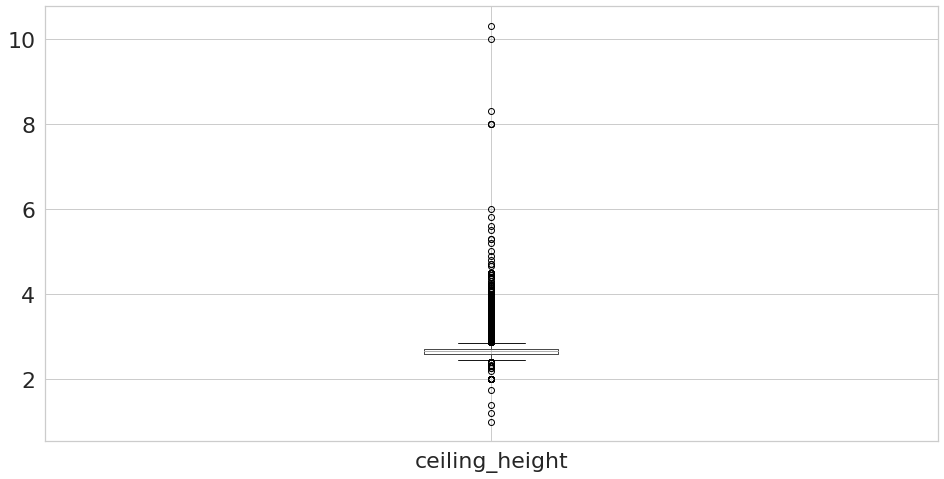

In [24]:
data.boxplot(column='ceiling_height')

In [25]:
data.query('ceiling_height > 6')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
3474,3,1400000.0,30.0,2018-03-16,1,8.0,5.0,15.3,2,False,...,7.3,NaN,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,125.0
5863,20,5650000.0,45.0,2018-08-15,1,8.3,16.0,19.3,14,False,...,8.3,1.0,Санкт-Петербург,13069.0,10763.0,0.0,NaN,1.0,613.0,14.0
15743,14,5600000.0,67.0,2016-11-11,3,8.0,16.0,41.0,1,False,...,8.0,NaN,Санкт-Петербург,32691.0,11035.0,1.0,723.0,0.0,NaN,474.0
17442,0,5350000.0,54.0,2015-06-16,2,8.0,5.0,29.0,2,False,...,NaN,1.0,Красное Село,24638.0,28062.0,0.0,NaN,0.0,NaN,469.0
22309,20,5300000.0,45.0,2017-09-30,1,10.3,16.0,15.5,15,False,...,NaN,NaN,Санкт-Петербург,36353.0,11936.0,2.0,440.0,2.0,450.0,136.0
22869,0,15000000.0,25.0,2018-07-25,1,10.0,5.0,14.0,5,False,...,11.0,5.0,Санкт-Петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0


Мы имеем 6 объектов недвижимости с высотой потолка более 6 метров. При этом большая часть из них явлется объектом с одной комнатой и жилой площадью менее 20 кв.метров. Такие значения являются выбросами, выводы по ним нельзя обобщить при изучении всего датафрейма, поэтому в дальнейшем потребуется их удаление.

**Выводы**

- Пропуски в столбце `ceiling_height` исправлены или заполнены медианным значением по столбцу; 
- Выявлены аномалии для дальнейшего удаления;
- Причина пропусков - неправильное заполнение полей пользователями.

#### Заполнение пропусков в колонке `'living_area'`.

In [26]:
data['living_area'].describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

In [27]:
living_area_99 = data['living_area'].quantile(q=0.99)
living_area_99

120.0

In [28]:
data[['rooms', 'living_area']].sort_values(by='living_area', ascending=False).head(15)

,rooms,living_area
19540,12,409.7
5358,15,409.0
12401,7,347.5
4237,7,332.0
12859,7,322.3
660,7,312.5
8018,5,301.5
14088,6,300.0
20273,6,279.6
22494,5,274.0


При медианном значении жилой площади в 30 кв.метров и учитывая тот факт, что 99% всех значений лежат ниже 120 кв.метров, мы имеем аномальные показатели в 200-400 кв.метров.

Логика подсказывает, что вероятнее всего жилая площадь зависит от общей площади и количества комнат. 

Для точного заполнения жилой площади в зависимости от общей, правильнее было бы использовать линейную регрессию. 
Однако, на данном этапе самым простым способом заполнения пропусков в этой колонке может быть заполнение через медиану, рассчитанную по каждой группировке количества комнат.

In [29]:
filling_median_group('living_area', 'rooms')

количество пропусков в living_area до изменений:  1903
количество пропусков living_area после изменений:  0


Так как значения заполнялись медианами и возможны ошибки, проведем логическую проверку и сравним жилую и общую площадь.

In [30]:
data.query('living_area >= total_area').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
1595,7,3200000.0,62.4,2019-04-23,4,2.65,5.0,63.6,2,False,...,NaN,1.0,Кингисепп,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3374,18,3650000.0,41.5,2018-02-14,3,2.50,5.0,45.0,3,False,...,NaN,NaN,Санкт-Петербург,12842.0,11005.0,0.0,NaN,1.0,745.0,24.0
8976,5,4350000.0,41.2,2017-03-17,3,2.50,5.0,45.0,3,False,...,NaN,NaN,Санкт-Петербург,14918.0,9601.0,0.0,NaN,1.0,694.0,560.0
9795,10,4000000.0,42.0,2017-11-20,3,2.50,5.0,45.0,3,False,...,NaN,NaN,Санкт-Петербург,11284.0,12562.0,1.0,358.0,1.0,117.0,276.0
9861,10,2350000.0,25.0,2017-12-03,0,2.65,22.0,25.0,17,False,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,13.0


In [31]:
data.query('living_area >= total_area').shape[0]

31

In [32]:
print('количество ошибок в заполнении', data.query('living_area >= total_area')['living_area'].count())

количество ошибок в заполнении 31


Для максимальной правдоподобности заполнения жилой площади, предлагаю заменить неверно заполненные значения на результат выражения `total_area` - `kitchen_area`. 

Так как в столбце `kitchen_area` пока содержатся NaN, то заполним сначала его, а затем вернемся к исправлению ошибочного заполнения пропусков по жилой площади.

Рассмотрим выбросы в этой колонке.

<AxesSubplot:>

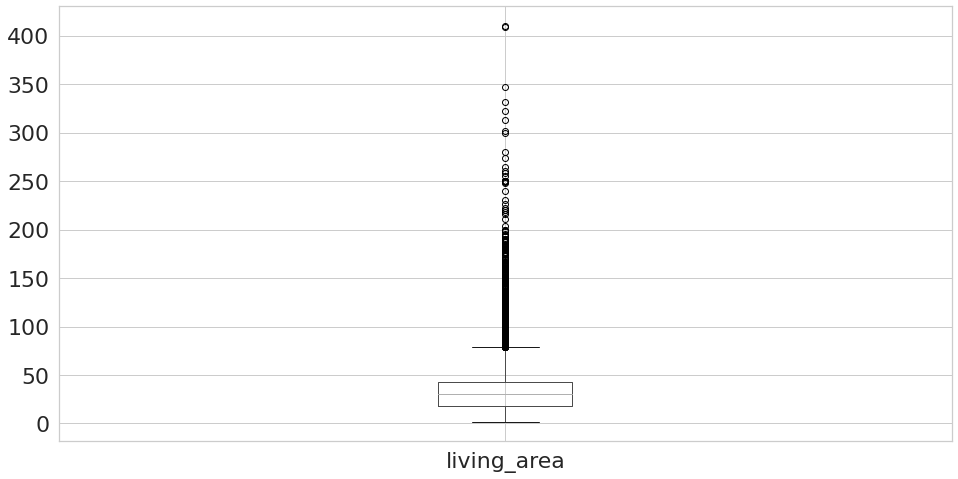

In [33]:
data.boxplot(column='living_area')

In [34]:
data.query('living_area >= 200').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
660,3,49950000.0,483.9,2017-10-04,7,3.20,6.0,312.5,4,False,...,26.4,NaN,Санкт-Петербург,23079.0,945.0,3.0,461.0,3.0,22.0,391.0
793,20,135000000.0,310.0,2018-05-22,4,3.30,5.0,250.0,2,False,...,50.0,NaN,Санкт-Петербург,34159.0,7251.0,2.0,295.0,3.0,190.0,342.0
866,5,25000000.0,363.0,2017-12-23,14,3.16,5.0,222.0,4,False,...,16.6,NaN,Санкт-Петербург,38076.0,7950.0,0.0,NaN,2.0,435.0,418.0
1085,16,75000000.0,323.0,2017-07-10,5,4.00,5.0,255.7,4,False,...,66.0,NaN,Санкт-Петербург,23713.0,594.0,3.0,398.0,2.0,515.0,259.0
1494,10,65000000.0,364.0,2018-11-27,7,3.90,6.0,250.0,3,False,...,20.0,NaN,Санкт-Петербург,21988.0,3254.0,0.0,NaN,1.0,689.0,46.0


In [35]:
data.query('living_area >= 200').shape[0]

33

Все объекты недвижимости с аномально большими значениями жилой площади, также имеют много комнат и большую общую площадь. Возможно, это коммерческие объекты под мероприятия. 

Однако, учитывая, что таких объектов всего 33 штуки, подобные аномалии следует удалить, по ним нельзя делать объективные выводы.

**Выводы**

- Пропуски столбца `living_area` заполнены медианными значениями, сгруппированными по количеству комнат;
- Выявлены аномалии для дальнейшего удаления;
- Причина пропусков - неправильное заполнение полей пользователями.

#### Заполнение пропусков в колонке `'kitchen_area'`.

In [36]:
data['kitchen_area'].describe()

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

In [37]:
kitchen_area_99 = data['kitchen_area'].quantile(q=0.99)
kitchen_area_99

35.08999999999996

Медианное значение площади кухни по всем объектам составляет 9 метров, при этом в 99% всех объектов площадь кухни не более 35 метров.

Ситуация с пропусками в колонке с площадью кухни напоминает подобную с жилой площадью. 
Вероятно, площадь кухни сильно зависит от года постройки и типа планировки помещения. 
Однако, таких данных у нас нет, поэтому придется прибегнуть к заполнению пропущенных значений в этой колонке снова через группировку по количеству комнат.

То есть мы будем исходить из предпосылки, что квартиры с одиновым количеством комнат имеют примерно схожую площадь кухни (что на практике, не совсем так, но это лучше, чем оставлять в столбце NaN или заполнять медианой по всему столбцу).

Для начала посмотрим на распределение медианной площади кухни по количеству комнат.

In [38]:
data.groupby('rooms')['kitchen_area'].median()

rooms
0        NaN
1       9.04
2       8.80
3       9.50
4      11.10
5      15.10
6      19.50
7      20.00
8      25.00
9      14.30
10     19.80
11     12.60
12    112.00
14     21.25
15    100.00
16     13.00
19     27.60
Name: kitchen_area, dtype: float64

In [39]:
data.loc[data['rooms'] == 0].shape[0]

197

В наших данных содержатся объекты недвижимости, с нулевым количеством комнат, их 194 шт. Вероятно, если как таковых комнат в помещении нет, то в нем нет и кухни, и NaN в данном случае можно заменить на 0.

In [40]:
data.loc[data['rooms'] == 0, 'kitchen_area'] = 0

Оставшиеся пропуски заполним группируясь по количеству комнат, с помощью ранее написанной функции.

In [41]:
filling_median_group('kitchen_area', 'rooms')

количество пропусков в kitchen_area до изменений:  2081
количество пропусков kitchen_area после изменений:  0


Теперь  вернемся к прошлой задаче и там, где жилая площадь получилась больше общей, заменим значения `living_area` на `total_area` - `kitchen_area`.

In [42]:
data['living_area'] = np.where(data['living_area'] > data['total_area'], data['total_area'] - data['kitchen_area'], data['living_area'])

In [43]:
print('количество ошибок в заполнении', data.query('living_area > total_area')['living_area'].count())

количество ошибок в заполнении 0


In [44]:
data['living_area'].isna().sum()

0

In [45]:
data.query('kitchen_area >= total_area').shape[0]

0

Несостыковок в соотношении общей площажи к жилой площади и площади кухни в аномальных объектах не выявлено.

Рассмотрим аномальные значения.

<AxesSubplot:>

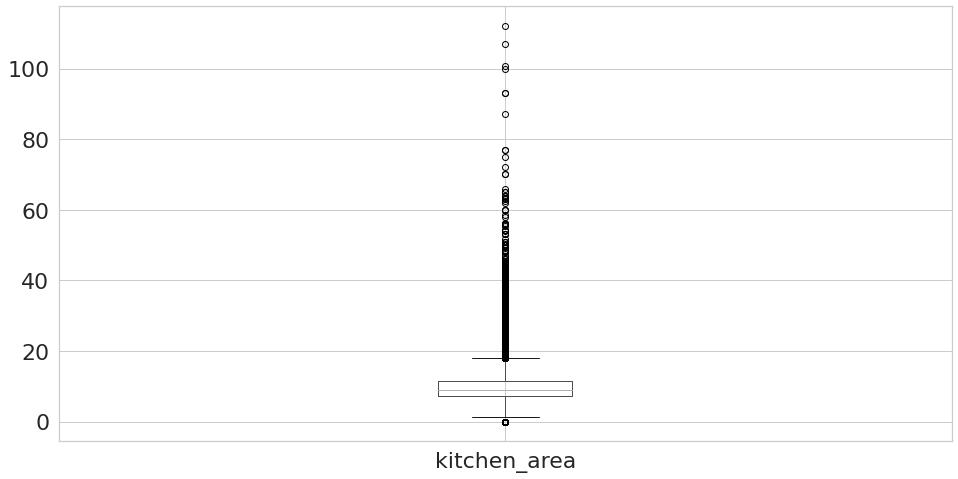

In [46]:
data.boxplot(column='kitchen_area')

In [47]:
data.query('kitchen_area >= 60').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
492,18,95000000.0,216.0,2017-12-05,4,3.00,5.0,86.0,4,False,...,77.0,NaN,Санкт-Петербург,21740.0,436.0,2.0,138.0,3.0,620.0,14.0
1026,20,155000000.0,310.0,2018-10-12,5,5.30,3.0,190.0,3,False,...,63.0,2.0,Санкт-Петербург,24899.0,4785.0,0.0,NaN,1.0,603.0,NaN
1085,16,75000000.0,323.0,2017-07-10,5,4.00,5.0,255.7,4,False,...,66.0,NaN,Санкт-Петербург,23713.0,594.0,3.0,398.0,2.0,515.0,259.0
2489,9,12500000.0,255.0,2017-04-21,3,2.65,2.0,153.9,2,False,...,100.7,0.0,Санкт-Петербург,29544.0,6916.0,0.0,NaN,3.0,198.0,102.0
3117,19,140000000.0,631.0,2019-03-30,7,2.65,5.0,145.0,5,False,...,60.0,NaN,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN


In [48]:
data.query('kitchen_area >= 60').shape[0]

27

Итого найдено 27 объектов с аномальной большой площадью кухни (выбросы), которые мы в дальнейшем удалим.

**Выводы**

- Пропуски столбца `kitchen_area` заполнены медианными значениями, сгруппированными по количеству комнат;
- Выявлены аномалии для дальнейшего удаления;
- Причина пропусков - неправильное заполнение полей пользователями.

#### Заполнение пропусков в колонке `'balcony'`.

In [49]:
data['balcony'].describe()

count    12180.000000
mean         1.150082
std          1.071300
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: balcony, dtype: float64

In [50]:
balcony_99 = data['balcony'].quantile(q=0.99)
balcony_99

5.0

В среднем преобладают квартиры с 1 балконом, в большинстве квартир их не более 2.

Выведем уникальные значения по столбцу.

In [51]:
data['balcony'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

Вероятно, если продавец не указал число балконов, то, скорее всего, в его квартире их нет. Такие пропуски логично заменить на 0. 

In [52]:
data['balcony'].fillna(0, inplace=True)

Рассмотрим аномалии в столбце.

<AxesSubplot:>

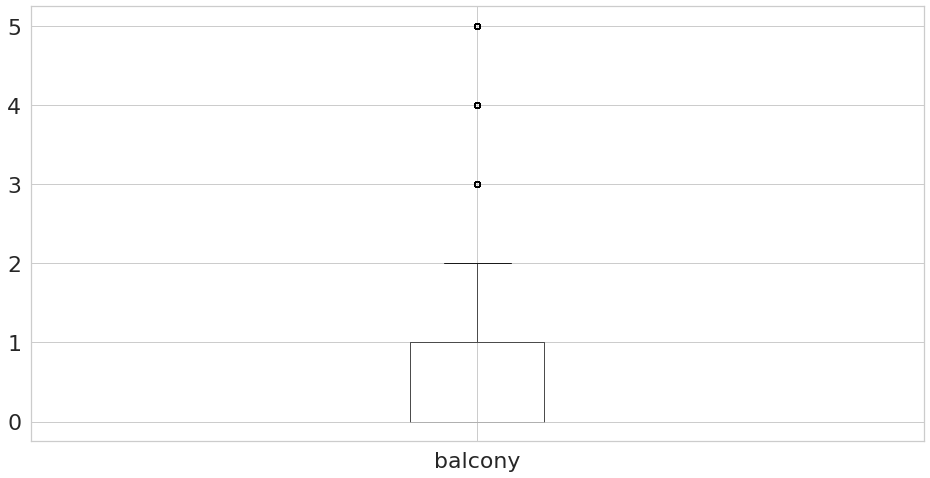

In [53]:
data.boxplot(column='balcony')

In [54]:
data.query('balcony == 5')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
41,16,7900000.0,74.00,2016-05-04,3,2.65,14.0,59.0,8,False,...,12.0,5.0,Санкт-Петербург,37715.0,12612.0,1.0,725.0,1.0,759.0,179.0
42,13,22000000.0,161.80,2015-07-08,4,2.80,4.0,80.9,2,False,...,17.6,5.0,Петергоф,35416.0,30605.0,2.0,47.0,1.0,907.0,987.0
116,18,10999000.0,97.20,2017-11-13,3,2.50,16.0,45.0,16,False,...,18.3,5.0,Санкт-Петербург,19426.0,21138.0,0.0,NaN,2.0,390.0,394.0
267,2,14700000.0,120.00,2018-09-07,3,2.75,20.0,63.0,18,False,...,16.0,5.0,Санкт-Петербург,39204.0,10430.0,2.0,627.0,3.0,77.0,61.0
311,20,12500000.0,86.00,2018-10-19,3,2.80,25.0,47.0,3,False,...,13.0,5.0,Санкт-Петербург,52192.0,15686.0,0.0,NaN,1.0,441.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23147,8,5780000.0,55.00,2017-11-23,2,2.55,10.0,28.6,8,False,...,8.0,5.0,Санкт-Петербург,42447.0,11146.0,1.0,451.0,0.0,NaN,41.0
23289,13,7000000.0,88.00,2018-03-02,3,2.50,15.0,54.0,12,False,...,12.0,5.0,Колпино,24501.0,30287.0,1.0,372.0,0.0,NaN,NaN
23363,10,4300000.0,52.00,2019-04-21,1,2.70,16.0,28.0,8,False,...,11.0,5.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23526,14,5800000.0,60.69,2018-03-13,3,2.50,9.0,39.7,2,False,...,6.2,5.0,Санкт-Петербург,51239.0,15954.0,0.0,NaN,0.0,NaN,30.0


В 99% всей недвижимости количество балконов не превышает 5и, однако есть 304 объекта с 5 балконами.
Либо это какая-то особенность определенного типа планировки или застройщика, либо пользователи неправильно заполнили данные (что маловероятно для такого внушительного количества объявлений).

**Выводы**

- Пропуски столбца `balcony` заполнены нулями;
- Выявлены аномальные значения.

#### Заполнение пропусков в колонках `'floors_total'` и `'locality_name'`.

Записей, где отсутствует общее количество этажей в доме и название населенного пункта, менее 0.5% от всего объема данных.

Восстановить эти данные каким-либо объективным способом не представляется возможным, поэтому просто удалим эти записи, это не повлияет на общие выводы нашего анализа.

In [55]:
data.dropna(subset=['locality_name'], inplace=True)
data.dropna(subset=['floors_total'], inplace=True)

Рассмотрим распределение значений в столбце `'floors_total'`.

<AxesSubplot:>

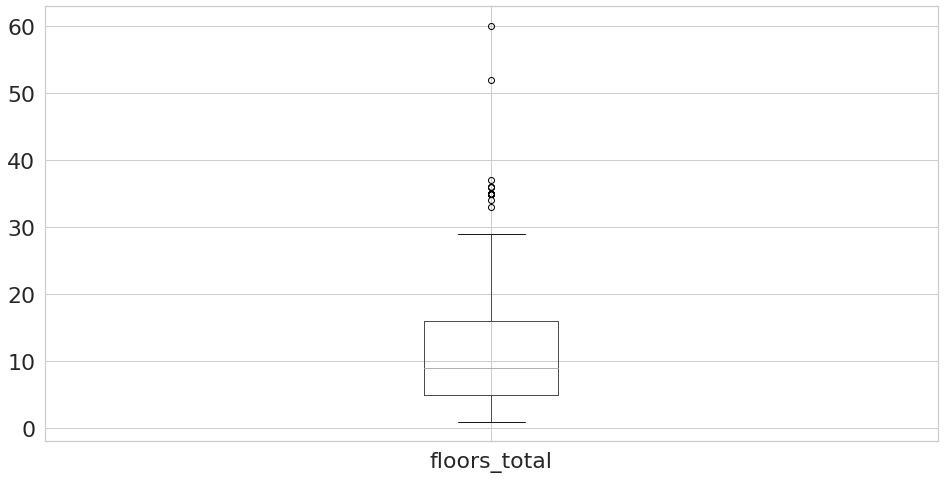

In [56]:
data.boxplot(column='floors_total')

In [57]:
data.query('floors_total > 40')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
2253,12,3800000.0,45.5,2018-06-28,2,2.88,60.0,27.4,4,False,...,7.4,0.0,Кронштадт,67763.0,49488.0,2.0,342.0,3.0,614.0,166.0
16731,9,3978000.0,40.0,2018-09-24,1,2.65,52.0,10.5,18,False,...,14.0,0.0,Санкт-Петербург,20728.0,12978.0,1.0,793.0,0.0,NaN,45.0


Выявлены 2 выброса с общим количеством этажей в доме более 40. Эти аномальные значения впоследствии будут удалены.

**Вывод**

Мы слегка почистили датасет от строк, для которых нет возможности восстановить незаполненые пользователем данные. Удаление таких значений возможно по причине того, что их менее 0.5% от всего объема данных. 

#### Анализ неявных дубликатов в колонке `'locality_name'`.

Выведем уникальные значения колонки с названиями населённых пунктов в лексикографическом порядке.

In [58]:
data.sort_values(['locality_name'])['locality_name'].unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [59]:
# выведем количество уникальных значений по столбцу

len(data['locality_name'].unique())

364

Посмотрим на данные в разрезе основных территориальных единиц - деревень, поселков и городов.

In [60]:
data[data['locality_name'].str.contains('деревня')].sort_values(['locality_name'])['locality_name'].unique()

array(['деревня Агалатово', 'деревня Аро', 'деревня Батово',
       'деревня Бегуницы', 'деревня Белогорка', 'деревня Большая Вруда',
       'деревня Большая Пустомержа', 'деревня Большие Колпаны',
       'деревня Большое Рейзино', 'деревня Большой Сабск', 'деревня Бор',
       'деревня Борисова Грива', 'деревня Ваганово', 'деревня Вартемяги',
       'деревня Вахнова Кара', 'деревня Выскатка', 'деревня Гарболово',
       'деревня Глинка', 'деревня Горбунки', 'деревня Гостилицы',
       'деревня Заклинье', 'деревня Заневка', 'деревня Зимитицы',
       'деревня Извара', 'деревня Иссад', 'деревня Калитино',
       'деревня Кальтино', 'деревня Камышовка', 'деревня Каськово',
       'деревня Келози', 'деревня Кипень', 'деревня Кисельня',
       'деревня Колтуши', 'деревня Коркино', 'деревня Котлы',
       'деревня Кривко', 'деревня Кудрово', 'деревня Кузьмолово',
       'деревня Курковицы', 'деревня Куровицы', 'деревня Куттузи',
       'деревня Лаврики', 'деревня Лаголово', 'деревня Лампово

При визуальном осмотре неявных дубликатов не выявлено.

In [61]:
data[data['locality_name'].str.contains('пос')].sort_values(['locality_name'])['locality_name'].unique()

array(['городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Советский',
       'городской посёлок Фёдоровское', 'городской посёлок Янино-1',
       'коттеджный поселок Кивеннапа Север', 'коттеджный поселок Счастье',
       'коттеджный посёлок Лесное', 'поселок Аннино', 'поселок Барышево',
       'поселок Бугры', 'поселок Возрождение', 'поселок Войсковицы',
       'поселок Володарское', 'поселок Гаврилово', 'поселок Гарболово',
       'поселок Гладкое', 'поселок Глажево', 'поселок Глебычево',
       'поселок Гончарово', 'поселок Громово', 'поселок Дружноселье',
       'поселок Елизаветино', 'поселок Жилгородок', 'поселок Жилпосёлок',
       'поселок Житково', 'пос

In [62]:
data[data['locality_name'].str.contains('город')].sort_values(['locality_name'])['locality_name'].unique()

array(['Ивангород', 'городской поселок Большая Ижора',
       'городской поселок Янино-1', 'городской посёлок Будогощь',
       'городской посёлок Виллози', 'городской посёлок Лесогорский',
       'городской посёлок Мга', 'городской посёлок Назия',
       'городской посёлок Новоселье', 'городской посёлок Павлово',
       'городской посёлок Рощино', 'городской посёлок Свирьстрой',
       'городской посёлок Советский', 'городской посёлок Фёдоровское',
       'городской посёлок Янино-1', 'поселок Жилгородок',
       'поселок городского типа Большая Ижора',
       'поселок городского типа Вырица',
       'поселок городского типа Дружная Горка',
       'поселок городского типа Дубровка',
       'поселок городского типа Ефимовский',
       'поселок городского типа Кондратьево',
       'поселок городского типа Красный Бор',
       'поселок городского типа Кузьмоловский',
       'поселок городского типа Лебяжье',
       'поселок городского типа Лесогорский',
       'поселок городского типа Наз

Итак, в наших данных обнаружена неконсистентность в названиях населенных пунктов. 

Самыми часто встречающимися проблемами является путаница в "поселок" и "посёлок", а также "поселок городского типа" и "городской поселок" (и различные комбинации этих названий c буквами "е" и "ё").

Причина различий в стиле написания населенных пунктов - либо в разных источниках данных, либо субъективный человеческий фактор при заполнении. 

Напишем функцию, которая на вход будет принимать название населенного пункта и возвращать его в более унифицированном виде.

In [63]:
def normalize_locality_name(value):
    
    if 'посёлок городского типа' in value:
        return value.replace('посёлок городского типа', 'поселок городского типа')
    
    if 'городской поселок' in value:
        return value.replace('городской поселок', 'поселок городского типа')
    if 'городской посёлок' in value:   
        return value.replace('городской посёлок', 'поселок городского типа')
       
    if 'посёлок' in value:
        return value.replace('посёлок', 'поселок')
    
    if 'поселок станции' in value:
        return value.replace('поселок станции', 'поселок при железнодорожной станции')
    
    if 'садоводческое некоммерческое товарищество' in value:
        return value.replace('садоводческое некоммерческое товарищество', 'садовое товарищество')
    
    else:
        return value   

In [64]:
# применим написанную  нами функцию к столбцу

data['locality_name'] = data['locality_name'].apply(normalize_locality_name)

Оценим визуально, удалось ли нам избавиться от неявных дубликатов.

In [65]:
data.sort_values(['locality_name'])['locality_name'].unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'деревня Агалатово', 'деревня Аро', 'деревня Батово',
       'деревня Бегуницы', 'деревня Белогорка', 'деревня Большая Вруда',
       'деревня Большая Пустомержа', 'деревня Большие Колпаны',
       'деревня Большое Рейзино', 'деревня Большой Сабск', 'деревня Бор',
       'деревня Борисова Грива', 'деревня Ваганово', 'деревня Вартемяги',
       'деревня Вахнова Кара', 'деревня Выскатка

In [66]:
# для сравнения выведем новое количество уникальных значений по столбцу

len(data['locality_name'].unique())

321

**Выводы**

- В столбце `locality_name` выявлены неявные дубликаты: в наименованиях населенных пунктов использовался разный стиль написания, что затрудняет анализ данных;

- Благодаря преобразованиям, удалось избавиться от неявных дубликатов, привести названия населенных пунктов к единому стилю, количество уникальных значений удалось сократить с 364 до 321.

- Помимо е и ё в слове поселок в списке видим населенные пункты, которые изменили свой статус:

1) поселок Мурино и Мурино,
2) деревня Кудрово и Кудрово.

При дальнейшей обработке стоит перенести тип населенного пункта в самостоятельный признак, а в столбце `locality_name` оставить только названия населенных пунктов.

#### Заполнение пропусков в колонках с картографическими данными.

Данные в колонках с расстояниями до центра, аэропорта, ближайшего парка и водоёма были получены автоматически, поэтому отсутствие значений в них свидетельствует о техническом сбое при заполнении или выгрузке данных, или о том, что система не имеет чётких критериев для оценки этих параметров.

Выведем мединные значения по этим колонкам в разрезе населённых пунктов.

In [67]:
columns_to_correct = ['airports_nearest', 'city_centers_nearest', 'parks_nearest', 'ponds_nearest', 'ponds_around_3000', 'parks_around_3000']

median_data = data.pivot_table(
    index='locality_name',
    values=columns_to_correct,
    aggfunc='median'
).sort_values(by='airports_nearest')

median_data

,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest
locality_name,,,,,,
поселок Александровская,12896.5,27468.0,0.0,NaN,1.0,711.5
Пушкин,15766.0,27930.5,1.0,399.5,0.0,444.0
поселок Шушары,17427.0,24212.0,0.0,NaN,0.0,584.5
Павловск,20529.5,32683.0,2.0,312.0,2.0,458.0
поселок Петро-Славянка,20605.0,27165.0,0.0,NaN,2.0,663.0
Красное Село,25723.5,29148.5,0.0,435.0,0.0,225.5
поселок Металлострой,25758.0,27602.0,0.0,NaN,0.0,NaN
Колпино,26232.0,32018.0,0.0,393.0,1.0,509.0
поселок Усть-Ижора,26510.5,28222.5,0.0,NaN,0.0,NaN


По тем населенным пунктам, где удалось получить медианную оценку интересующих нас параметров, заполним пропуски медианой с группировкой по столбцу с указанием населенного пункта `'locality_name'` с помощью ранее написанной функции.

In [68]:
for column in columns_to_correct:

    filling_median_group(column, 'locality_name')

количество пропусков в airports_nearest до изменений:  5524
количество пропусков airports_nearest после изменений:  5432
количество пропусков в city_centers_nearest до изменений:  5501
количество пропусков city_centers_nearest после изменений:  5432
количество пропусков в parks_nearest до изменений:  15535
количество пропусков parks_nearest после изменений:  5986
количество пропусков в ponds_nearest до изменений:  14529
количество пропусков ponds_nearest после изменений:  5517
количество пропусков в ponds_around_3000 до изменений:  5500
количество пропусков ponds_around_3000 после изменений:  5432
количество пропусков в parks_around_3000 до изменений:  5500
количество пропусков parks_around_3000 после изменений:  5432


В наших колонках всё равно осталось по 5 с лишним тысяч объектов, для которых посчитать расстояния без подробного картографического анализа не представляется возможным.

Выведем наиболее распространенные населенные пункты с проблемой отсутствия значений в данных колонках. 

In [69]:
data[data['airports_nearest'].isna()]['locality_name'].value_counts().head(15)

поселок Мурино             552
Всеволожск                 398
Гатчина                    307
деревня Кудрово            299
Выборг                     237
Кудрово                    171
деревня Новое Девяткино    143
Сертолово                  142
Кириши                     125
поселок Бугры              113
Сланцы                     112
Волхов                     111
Тосно                      104
Кингисепп                  104
Никольское                  93
Name: locality_name, dtype: int64

In [70]:
data[data['city_centers_nearest'].isna()]['locality_name'].value_counts().head(15)

поселок Мурино             552
Всеволожск                 398
Гатчина                    307
деревня Кудрово            299
Выборг                     237
Кудрово                    171
деревня Новое Девяткино    143
Сертолово                  142
Кириши                     125
поселок Бугры              113
Сланцы                     112
Волхов                     111
Тосно                      104
Кингисепп                  104
Никольское                  93
Name: locality_name, dtype: int64

In [71]:
data[data['parks_nearest'].isna()]['locality_name'].value_counts().head(15)

поселок Мурино             552
поселок Шушары             439
Всеволожск                 398
Гатчина                    307
деревня Кудрово            299
Выборг                     237
Кудрово                    171
деревня Новое Девяткино    143
Сертолово                  142
Кириши                     125
поселок Бугры              113
Сланцы                     112
Волхов                     111
Кингисепп                  104
Тосно                      104
Name: locality_name, dtype: int64

In [72]:
data[data['ponds_nearest'].isna()]['locality_name'].value_counts().head(15)

поселок Мурино             552
Всеволожск                 398
Гатчина                    307
деревня Кудрово            299
Выборг                     237
Кудрово                    171
деревня Новое Девяткино    143
Сертолово                  142
Кириши                     125
поселок Бугры              113
Сланцы                     112
Волхов                     111
Тосно                      104
Кингисепп                  104
Никольское                  93
Name: locality_name, dtype: int64

In [73]:
data[data['ponds_around_3000'].isna()]['locality_name'].value_counts().head(15)

поселок Мурино             552
Всеволожск                 398
Гатчина                    307
деревня Кудрово            299
Выборг                     237
Кудрово                    171
деревня Новое Девяткино    143
Сертолово                  142
Кириши                     125
поселок Бугры              113
Сланцы                     112
Волхов                     111
Тосно                      104
Кингисепп                  104
Никольское                  93
Name: locality_name, dtype: int64

In [74]:
data[data['parks_around_3000'].isna()]['locality_name'].value_counts().head(15)

поселок Мурино             552
Всеволожск                 398
Гатчина                    307
деревня Кудрово            299
Выборг                     237
Кудрово                    171
деревня Новое Девяткино    143
Сертолово                  142
Кириши                     125
поселок Бугры              113
Сланцы                     112
Волхов                     111
Тосно                      104
Кингисепп                  104
Никольское                  93
Name: locality_name, dtype: int64

Как мы видим, вероятно, значения отсутствуют для одних и тех же объектов, для них не указана ни одна из характеристик по расстояниям.
Скорее всего, пропуски появляются в населенных пунктах, которые не являются городами или прилично удалены от административных центров. Либо же нет картографических данных для рассчета расстояний.

Без глубокого анализа местоположения на карте и планировки этих населенных пунктов, мы не можем объективно заполнить пропуски, ведь все населенные пункты разные по плану строительства и удаленности друг от друга на карте (например, одни могут находиться севернее Санкт-Петербурга и быть дальше от аэропорта, другие южнее города и быть ближе к аэропорту).

Также, нет возможности адекватно заполнить и количество парков/прудов, находящихся в радиусе 3 км от объекта недвижимости. Тот факт, что покупатель не указал эту информацию может говорить о его неосведомленности на этот счет или просто невнимательности при заполнении, но не дает нам никакого понимания реально картины применительно к конкретному объекту.

Заполнение пропусков неким общим медианным  значением может очень сильно исказить распределение и за счет грубого заимствования несвязанной с конкретным объектом информации, в конечном итоге исказить и наш анализ.

С другой стороны, таких объектов с пропусками в нашем датасете около 23% и мы не можем их просто удалить, прочие столбцы содержат важную информацию об объекте недвижимости, заполненную самими пользователями.

Поэтому на данном этапе предлагаю оставить эти пропуски как есть, при подсчете количественных статистик эти объекты просто не будут учтены.

**Выводы**

- Были выдвинуты гипотезы о природе пропусков и оптимальном способе их заполнения;
- Пропуски в колонках были заполнены медианными значения с группировкой по населенным пунктам;
- Оставшиеся пропуски за неимением объективной предпосылки к заполнению были решено оставить нетронутыми;
- Было выявлено, что оставшиеся пропуски относятся к одинаковым объектам, что дает основания изменить сам способ сбора данных.

#### Заполнение колонки `days_exposition` — сколько дней было размещено объявление (от публикации до снятия).

In [75]:
# выведем описательные статистики для этого столбца

data['days_exposition'].describe()

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [162]:
days_exposition_99 = data['days_exposition'].quantile(q=0.9)
days_exposition_99

475.7999999999993

Определяющим сроком для снятия объявления с публикации считется 95 дней (медианное значение), так как оно делит весь датасет на две части.

Однако есть объявления, между публикацией которых и снятием прошло 1580 дней (максимум) или 1 день (минимум).
Это может быть связано, например, с тем, что пользователь опубликовал объявление и, быстро передумав, снял его совсем или для редактуры.

Подавляющее большинство всех объявлений снимаются с публикации в срок до 1067 дней.

Также в колонке присутствует 3181 пропуск, которые мы попытаемся заполнить, изучив их природу.

Рассмотрим график распределения всех объявлений по датам публикации.

In [77]:
data['first_day_exposition'].describe()

count                   23565
unique                   1489
top       2018-02-01 00:00:00
freq                      366
first     2014-11-27 00:00:00
last      2019-05-03 00:00:00
Name: first_day_exposition, dtype: object

<AxesSubplot:>

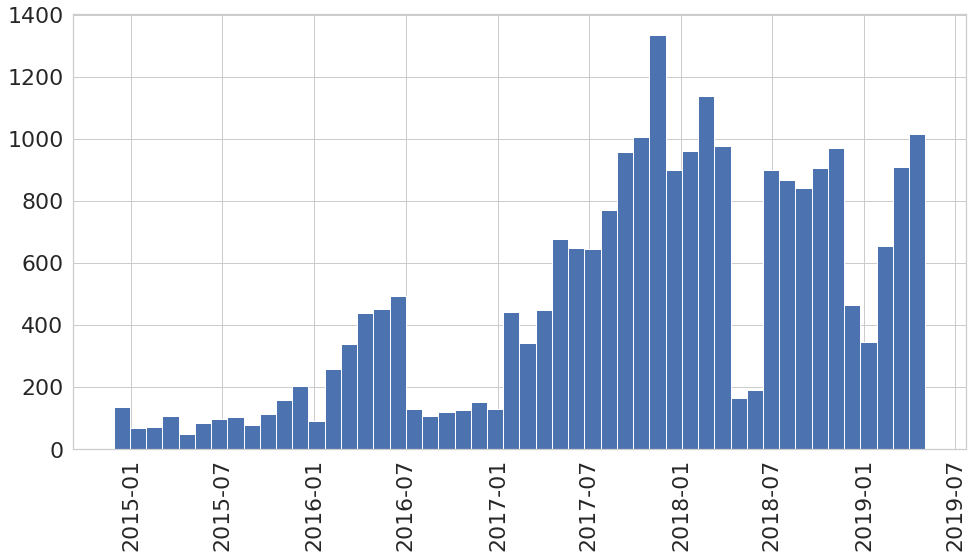

In [78]:
data['first_day_exposition'].hist(bins=50, xrot=90)

В наших данных все объекты недвижимости были размещены с 27 ноября 2014 года по 3 мая 2019 года.

Выберем строки, в которых отсутствует значение `days_exposition` и построим гистограмму распределения количества объявлений по дате размещения.

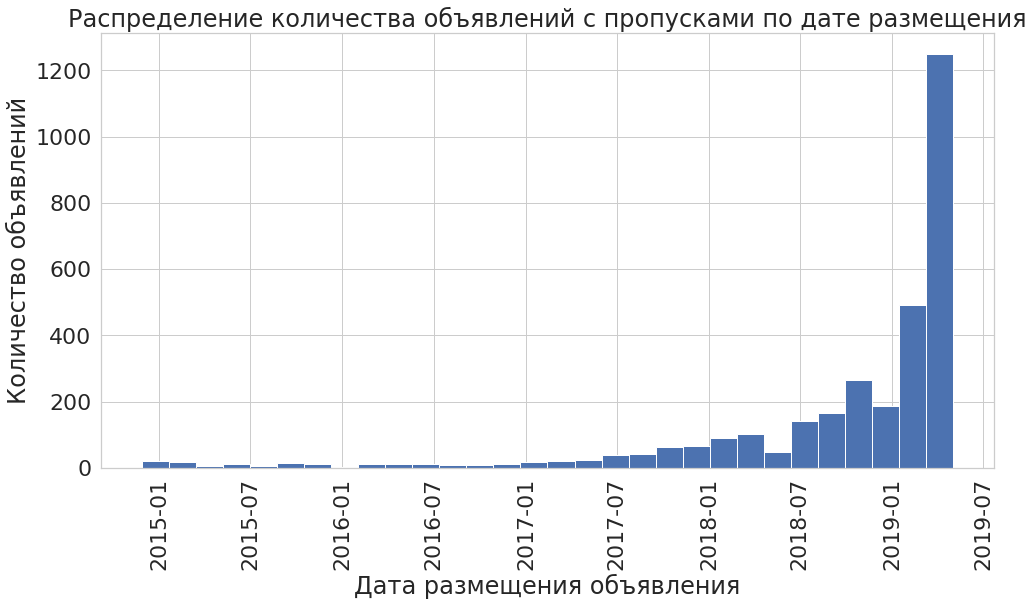

In [79]:
# выборка объявлений с пропусками в days_exposition:
day_na = data.query('days_exposition.isna()')

#гистограмма по дате размещения объявлений:
day_na['first_day_exposition'].hist(bins=30, xrot=90).set(xlabel='Дата размещения объявления',
                                                          ylabel='Количество объявлений', 
                                                          title='Распределение количества объявлений с пропусками по дате размещения');

Из гистограммы видно, что чем ближе дата размещения объявления к максимальной дате по столбцу, тем больше в базе данных объявлений с пропусками в `days_exposition`.

Больше половины объектов, выставленных на продажу в 2019 году, не имеет рассчитанного "времени продажи квартиры", эти значения составляют наибольшую долю пропусков. Также высокая доля пропусков, хоть и меньшая - в 2018 году. 

То есть, чем свежее объявление - тем выше вероятность пропуска в этой колонке.

Можно предположить, что причиной пропусков является тот факт, что эти объявления не были закрыты (квартиры не проданы, либо не сняты с продажи) вплоть до даты выгрузки базы данных из системы. Следовательно, пропуски в колонке не случайны и объективно их заполнить у нас нет возможности, оставим как есть.

**Выводы**

- В наших данных все объекты недвижимости были размещены с 27 ноября 2014 года по 3 мая 2019 года;
- Среднее время закрытия объявления составляет 180 дней с даты подачи, подавляющая часть объявлений закрывается в течение 231-475 дней; 
- БОльшая часть пропусков в данных приходится на 2019 год, некоторая доля на 2018й год;
- Пропуски значений столбца `days_exposition` обусловлены тем, что объявления не были закрыты до момента выгрузки информации из базы, т.е. объект не продан;
- Пропуски в колонке не носят случайного или ошибочного характера, а потому не подлежат заполнению.

#### Аномалии в столбце `'last_price'`.

Посмотрим на распределение цен объектов недвижимости на момент снятия публикации. 

In [83]:
data['last_price'].describe()

count    2.356500e+04
mean     6.540058e+06
std      1.091093e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [84]:
data['last_price'].sort_values()

8793         12190.0
17456       430000.0
14911       430000.0
16274       440000.0
9581        450000.0
            ...     
15651    300000000.0
1436     330000000.0
14706    401300000.0
19540    420000000.0
12971    763000000.0
Name: last_price, Length: 23565, dtype: float64

In [85]:
last_price_99 = data['last_price'].quantile(q=0.99)
last_price_99

36000000.0

Подавляющее большинство объектов стоит не более 36 млн.р., при этом медианное значение 4,647 млн.р., а среднее 6,5 млн.р., что говорит о факте наличия объектов недвижимости с аномального большими ценами, то есть на гистограмме мы получим длинный хвост справа.

<AxesSubplot:>

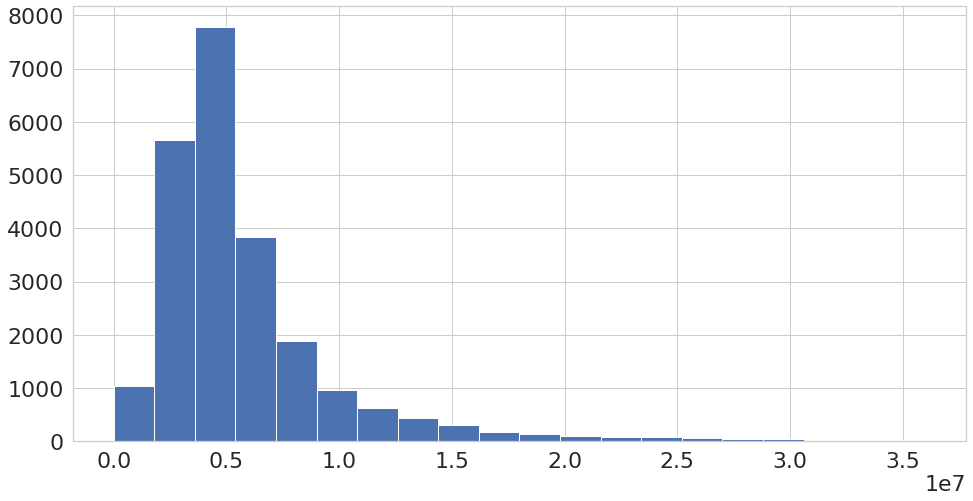

In [86]:
data['last_price'].hist(bins=20, range=(0, last_price_99))

In [87]:
data.query('last_price > @last_price_99').shape[0]

235

Таким образом, в нашем датасете всего 235 объектов, которые стоят более 36 млн.р.

Минимальное значение по колонке для строки 8793 составляет всего 12190 р., веротно, оно представляет собой ошибку в заполнении данных (покупатель указал цену не в рублях, а в тыс.р.), которую мы можем исправить.

In [88]:
data.loc[8793, 'last_price'] = 12190000

Рассмотрим распределение цен в разрезе по количеству комнат.

<AxesSubplot:xlabel='rooms', ylabel='last_price'>

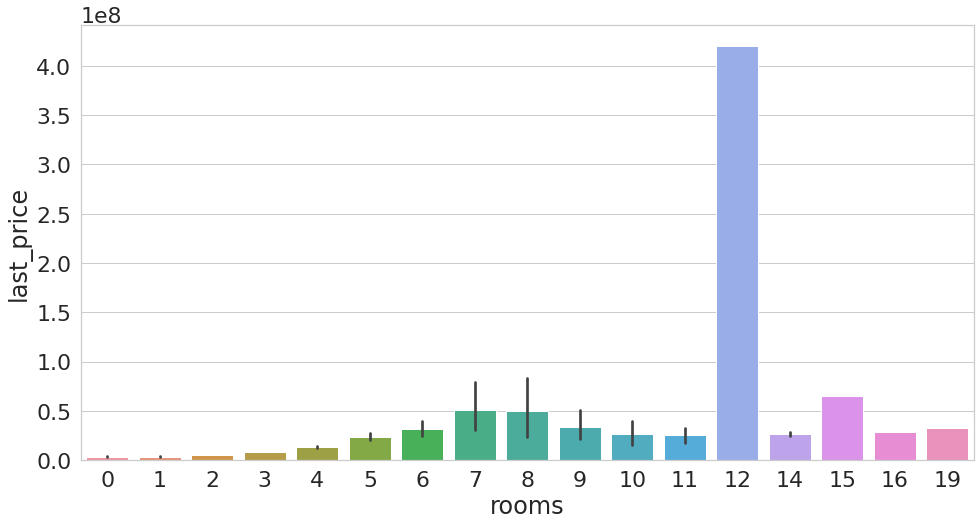

In [89]:
sns.barplot(data=data, x='rooms', y='last_price')

In [90]:
data.query('rooms == 12 or rooms == 15')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
5358,20,65000000.0,590.0,2019-02-14,15,3.5,6.0,409.0,3,False,...,100.0,0.0,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,504.0,14.0
19540,8,420000000.0,900.0,2017-12-06,12,2.8,25.0,409.7,25,False,...,112.0,0.0,Санкт-Петербург,30706.0,7877.0,0.0,460.0,2.0,318.0,106.0


Данные записи представляют собой выбросы, так как других квартир с 12 и 15 комнатами у нас нет, при этом их цены выше 99го перцентиля по всему столбцу. Удалим аномальные значения и снова посмотрим на распределение цен.

In [91]:
data = data.query('rooms != 12 and rooms != 15')

<AxesSubplot:xlabel='rooms', ylabel='last_price'>

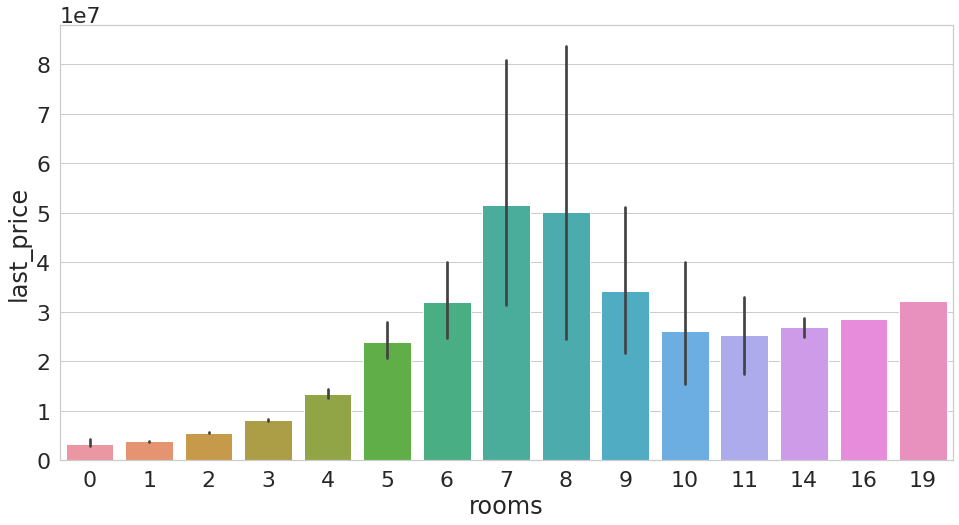

In [92]:
sns.barplot(data=data, x='rooms', y='last_price')

За счет отсечения единичных значений, выбивающихся из общего тренда, распределение стало более равномерным.

**Выводы**

- В столбце `'last_price'` были найдены и исправлены/удалены аномалии;
- Было рассмотрено и визуализировано распределение значений по колонке.

#### Преобразование типов колонок.

После проведенных манипуляций, проверим наличие пропусков и типы данных колонок.

In [93]:
data.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest        5432
city_centers_nearest    5432
parks_around_3000       5432
parks_nearest           5986
ponds_around_3000       5432
ponds_nearest           5517
days_exposition            0
dtype: int64

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23563 entries, 0 to 23698
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23563 non-null  int64         
 1   last_price            23563 non-null  float64       
 2   total_area            23563 non-null  float64       
 3   first_day_exposition  23563 non-null  datetime64[ns]
 4   rooms                 23563 non-null  int64         
 5   ceiling_height        23563 non-null  float64       
 6   floors_total          23563 non-null  float64       
 7   living_area           23563 non-null  float64       
 8   floor                 23563 non-null  int64         
 9   studio                23563 non-null  bool          
 10  open_plan             23563 non-null  bool          
 11  kitchen_area          23563 non-null  float64       
 12  balcony               23563 non-null  float64       
 13  locality_name   

Теперь, избавившись от пропущенных значений, мы можем завершить преобразование типа данных в колонках `floors_total`, `balcony`, `days_exposition` в формат int из формата float.

In [95]:
data['floors_total'] = data['floors_total'].astype(int)
data['balcony'] = data['balcony'].astype(int)
data['days_exposition'] = data['days_exposition'].astype(int)

### Выводы по разделу

Была проведена работа по предобработке входных данных:

- нахождение и заполнение пропусков, 
- нахождение и изучение природы аномалий, а также исправление некоторых случаев,
- подробное изучение значений по колонкам,
- исправление неявных дубликатов,
- визуализация распаределения признаков,
- изменение типа данных.

В процессе предобработки данных пропуски были заполнены в зависимости от ситуации:

- медианой по группам значений либо общей медианой по всем значениям, 
- там, где логически это возможно – конкретными значениями (например, нулями),
- пропуски значений столбца `days_exposition` заполнены разностью между значением `first_day_exposition` и максимальной датой в днях поля `first_day_exposition`.

В случаях , когда заполнение невозможно, строки были удалены или, учитывая природу данных, оставлены без заполнения, так как это исказило бы изначальное распределение в колонках и наши выводы.

Значения столбца `locality_name` категоризированы по наименованиям населенных пунктов (различные стили написания систематизированы и приведены в единообразию).

<div class="alert alert-success">
✔️ Комментарий ревьюера ✔️ 
    
В целом, работа по предобработке проведена очень качественно. Можно еще сэкономить память, изменяя типы данных. Например, дополнительно изменить их у площадей квартир с float64 на float32.   
    
</div>    

## Добавление в таблицу новых столбцов

Задача - добавить в таблицу новые столбцы со следующими параметрами:
    
- цена одного квадратного метра;
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры (значения — «первый», «последний», «другой»);
- расстояние до центра города в километрах.

In [96]:
# добавляем столбец price_sq_meter с расчетом цены за 1 кв.м. с округление до 2 знаков после запятой

data['price_sq_meter'] = round(data['last_price'] / data['total_area'], 2)

In [97]:
# добавление столбца с днем недели публикации объявления
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday

# добавление столбца с месяцем публикации объявления
data['month_exposition'] = data['first_day_exposition'].dt.month

# добавление столбца с годом публикации
data['year_exposition'] = data['first_day_exposition'].dt.year

In [98]:
# добавляем столбец с укзанием типа этажа квартиры, категоризируя данные через функцию

def floors_category(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

# применяем метод apply и функцию для создания нового столбца:
data['floor_category'] = data.apply(floors_category, axis=1)  

In [99]:
# добавляем столбцец с расстоянием до центра города в километрах

data['city_center_km'] = round(data['city_centers_nearest'] / 1000, 2)

In [100]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_sq_meter,weekday_exposition,month_exposition,year_exposition,floor_category,city_center_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2.0,755.0,57,120370.37,3,3,2019,другой,16.03
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,NaN,0.0,584.5,81,82920.79,1,12,2018,первый,18.60
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,90.0,2.0,574.0,558,92785.71,3,8,2015,другой,13.93
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,45.0,9,False,...,84.0,3.0,234.0,424,408176.10,4,7,2015,другой,6.80
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1.0,48.0,121,100000.00,1,6,2018,другой,8.10


## Исследовательский анализ данных

### Изучение параметров объектов

Задача - изучить и визуализировать с помощью гистограмм такие параметры, как

- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- этаж квартиры;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего аэропорта;
- расстояние до ближайшего парка;
- день, месяц и год публикации объявления.

Так как ранее нами были обнаружены в данных разнообразные выбросы, то для их удаления напишем функцию.

В классическом случае, выбросами являются значения, которые лежат на расстоянии, превышающем 1,5 межквартильных размаха в обе стороны от 25го и 75го процентиля.

In [101]:
def outlier_info(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    # посчитаем межквартильный размах
    iqr = q3 - q1
    count_out = df.loc[(df[column] > q3 + 1.5*iqr) | (df[column] < q1 - 1.5*iqr), column].shape[0]
    percent_out = round(count_out * 100 / len(df[column]), 2)
    outliers_df = pd.DataFrame({'column_name': column,
                                'percent_out': [percent_out]}).set_index('column_name')
    
    print(outliers_df)

In [102]:
columns_with_outlayers = ['last_price', 'total_area', 'rooms', 'ceiling_height', 'floors_total', 'living_area', 'kitchen_area', 'balcony', 'days_exposition']

for column in columns_with_outlayers:
    outlier_info(data, column)

             percent_out
column_name             
last_price          8.68
             percent_out
column_name             
total_area          5.25
             percent_out
column_name             
rooms               0.37
                percent_out
column_name                
ceiling_height        12.44
              percent_out
column_name              
floors_total         0.14
             percent_out
column_name             
living_area         3.32
              percent_out
column_name              
kitchen_area         7.27
             percent_out
column_name             
balcony             2.41
                 percent_out
column_name                 
days_exposition         8.25


Поскольку распределение признаков объектов несимметрично и мы рискуем потерять до 12% всех данных, удалив выбросы исходя из полуторного межквартильного размаха, то предлагаю базироваться на рассчете 1го и 99го перцентиля для удаления аномальных значений.

In [103]:
# функция для отсечения выбросов значений столбца, выходящих за рамки 1го и 99го процентиля

def outliers_cut(column):
    
    # считаем 1% и 99% процентили как границы межквартильного размаха в первоначальном датафрейме:
    threshold_min = round(data[column].quantile(0.01), 2) 
    threshold_max = round(data[column].quantile(0.99), 2)
    
    # отсекаем выбросы столбца по пороговым значениям:
    print(column)
    print('нижняя граница выбросов', threshold_min)
    print('верхняя граница выбросов', threshold_max)
    print('самое частое значение', data[column].mode())
    print('медианное значение', data[column].median())
    return data.loc[(data[column] >= threshold_min) & (data[column] <= threshold_max), column]

In [104]:
# функция, возвращающая датафрейм без выбросов

def df_without_outliers(df, column):
    df_new = df.copy()
    
    # считаем 1% и 99% процентили как границы межквартильного размаха в первоначальном датафрейме:
    threshold_min = round(df[column].quantile(0.01), 2) 
    threshold_max = round(df[column].quantile(0.99), 2)
    
    # отсекаем выбросы столбца по по пороговым значениям:
    print(column)
    print('доля выбросов', round(len(df_new.loc[(df_new[column] < threshold_min) | (df_new[column] > threshold_max)]) * 100 / len(df_new[column]), 2))
    print('число строк нового датафрейма', len(df_new.loc[(df_new[column] >= threshold_min) & (df_new[column] <= threshold_max)]))
    return df_new.loc[(df_new[column] >= threshold_min) & (df_new[column] <= threshold_max)]

In [105]:
# проверим выводимую функцией информацию

outliers_cut('last_price')

last_price
нижняя граница выбросов 1000000.0
верхняя граница выбросов 36000000.0
самое частое значение 0    4500000.0
dtype: float64
медианное значение 4646000.0


0        13000000.0
1         3350000.0
2         5196000.0
4        10000000.0
5         2890000.0
            ...    
23694     9700000.0
23695     3100000.0
23696     2500000.0
23697    11475000.0
23698     1350000.0
Name: last_price, Length: 23106, dtype: float64

Чтобы визуализировать распределение параметров по каждому интересующему нас признаку, сопоставляя его распределение в полном датасете и датасете без выбросов, зададим функцию отрисовки гистограммы. 

In [106]:
def plot_graph(name_param, column):

    plt.hist(data[column], 
         bins=20, 
         range=(data[column].min() - 0.05, data[column].quantile(q=0.995)),
         histtype='step', 
         alpha=0.7, 
         linewidth=5, 
         label= 'Для всех квартир')
    plt.hist(outliers_cut(column), 
         bins=30, 
         histtype='step', 
         alpha=0.7, 
         linewidth=5, 
         label='Для объектов без аномалий')
    plt.title(f'Распределение по признаку "{name_param}"')
    plt.xlabel(f'{name_param}')
    plt.ylabel('Количество объектов')
    plt.legend(loc='upper right')
    plt.show()
    print(f'Наибольшие по параметру {name_param} варианты:')
    print(data[column].sort_values(ascending=False).head())
    print(f'Наименьшие по параметру {name_param} варианты:')
    print(data[column].sort_values().head())

#### Параметр "Общая площадь".

total_area
нижняя граница выбросов 25.32
верхняя граница выбросов 197.0
самое частое значение 0    45.0
dtype: float64
медианное значение 52.0


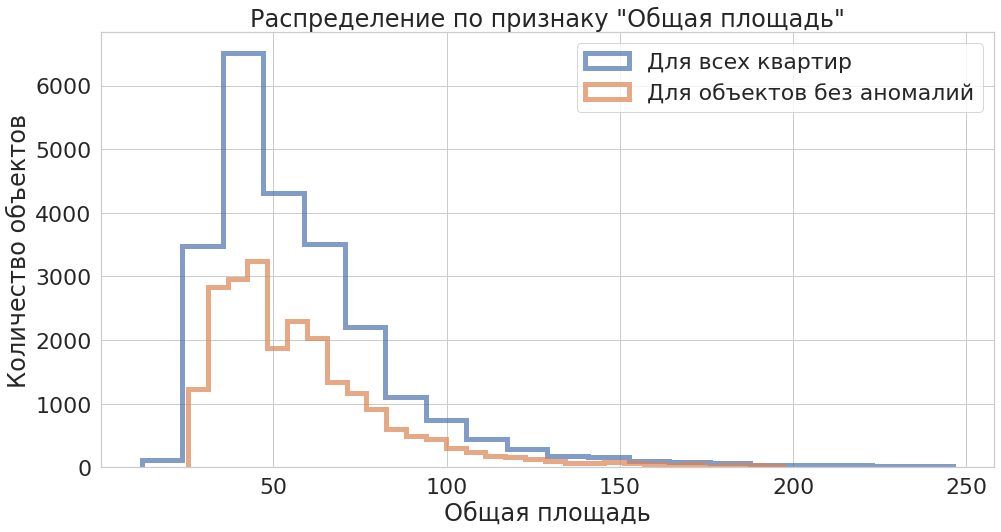

Наибольшие по параметру Общая площадь варианты:
12859    631.2
3117     631.0
15651    618.0
4237     517.0
8018     507.0
Name: total_area, dtype: float64
Наименьшие по параметру Общая площадь варианты:
19904    12.0
19807    13.0
19546    13.0
17961    13.0
19558    13.2
Name: total_area, dtype: float64


In [107]:
plot_graph('Общая площадь', 'total_area')

**Выводы**

На продажу выставлены квартиры общей площадью от 12 до 632 кв.м. 


В основном это жилье общей площадью от 25 до 150 кв.м. с двумя характерными пиками: в сегменте 30-50 кв.м. и несколько меньшим по количеству объявлений сегменте 50-75 кв.м.


Самым "популярным" метражом является 45-52 метра, т.е. современная однокомнатная или малогабаритная "двушка".

#### Параметр "Жилая площадь".

living_area
нижняя граница выбросов 13.0
верхняя граница выбросов 117.4
самое частое значение 0    18.0
dtype: float64
медианное значение 30.3


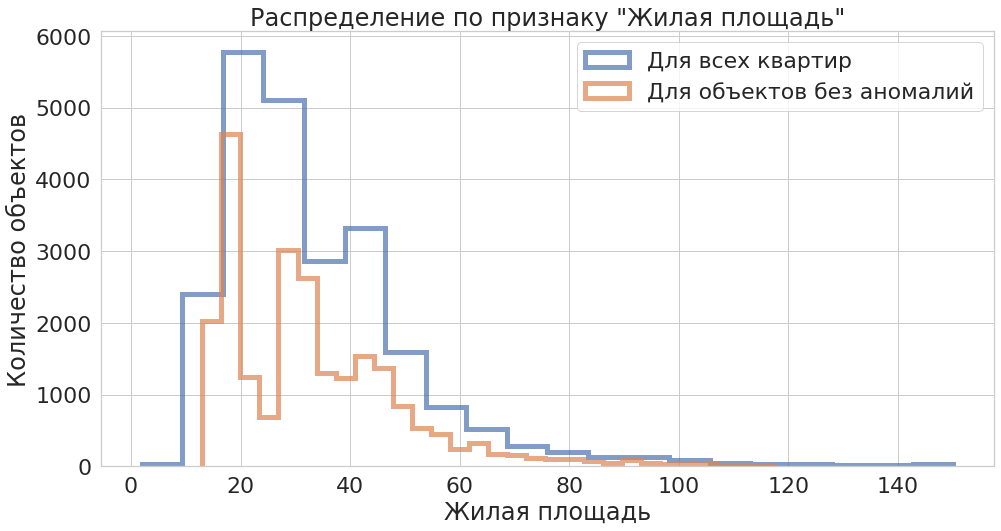

Наибольшие по параметру Жилая площадь варианты:
12401    347.5
4237     332.0
12859    322.3
660      312.5
8018     301.5
Name: living_area, dtype: float64
Наименьшие по параметру Жилая площадь варианты:
21758    2.00
13915    2.00
23574    3.00
3242     3.00
19546    3.96
Name: living_area, dtype: float64


In [108]:
plot_graph('Жилая площадь', 'living_area')

**Выводы**

На продажу выставлены квартиры c жилой площадью от 2 до 347 кв.м. 


В основном это жилая площадь варьируется от 13 до 117 кв.м. с двумя характерными пиками: 18 и 30 кв.м.
    
Эти цифры коррелируют с полученными нами ранее значениями по общей площади, как размер комнат в современной просторной однокомнтной квартире или 2 комнаты в малогабаритной "двушка".

#### Параметр "Площадь кухни".

kitchen_area
нижняя граница выбросов 4.0
верхняя граница выбросов 35.0
самое частое значение 0    6.0
dtype: float64
медианное значение 9.04


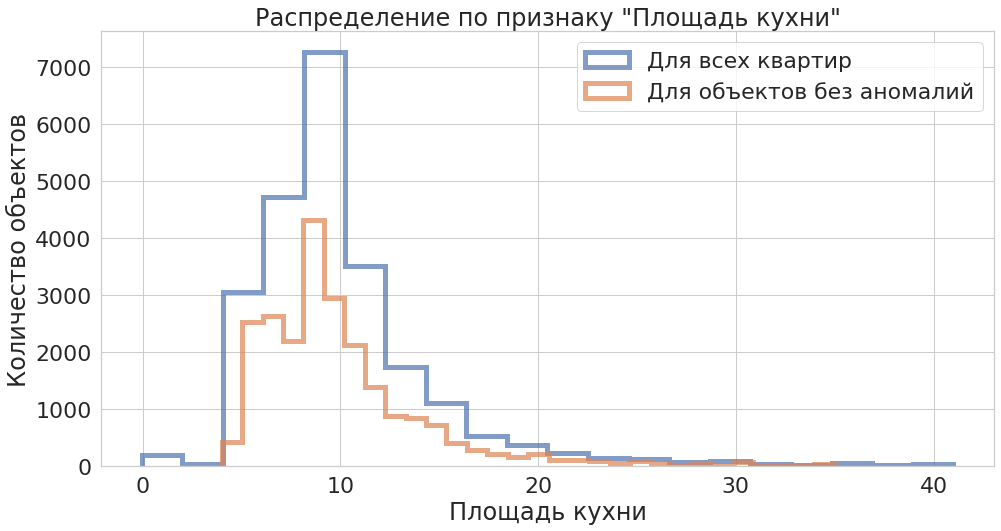

Наибольшие по параметру Площадь кухни варианты:
20215    107.0
2489     100.7
16239     93.2
16797     93.0
10867     87.2
Name: kitchen_area, dtype: float64
Наименьшие по параметру Площадь кухни варианты:
11035    0.0
9412     0.0
10416    0.0
6805     0.0
23554    0.0
Name: kitchen_area, dtype: float64


In [109]:
plot_graph('Площадь кухни', 'kitchen_area')

**Выводы**

На продажу выставлены квартиры c площадью кухни от 0 (то есть совсем без кухни) до 107 кв.м. 

В основном это варианты с кухнями от 4 до 20 кв.м. с модой в районе 6 и медианным значением 9 метров.


Это стандартные небольшие квартиры эконом-класса.

#### Параметр "Цена объекта".

last_price
нижняя граница выбросов 1000000.0
верхняя граница выбросов 36000000.0
самое частое значение 0    4500000.0
dtype: float64
медианное значение 4646000.0


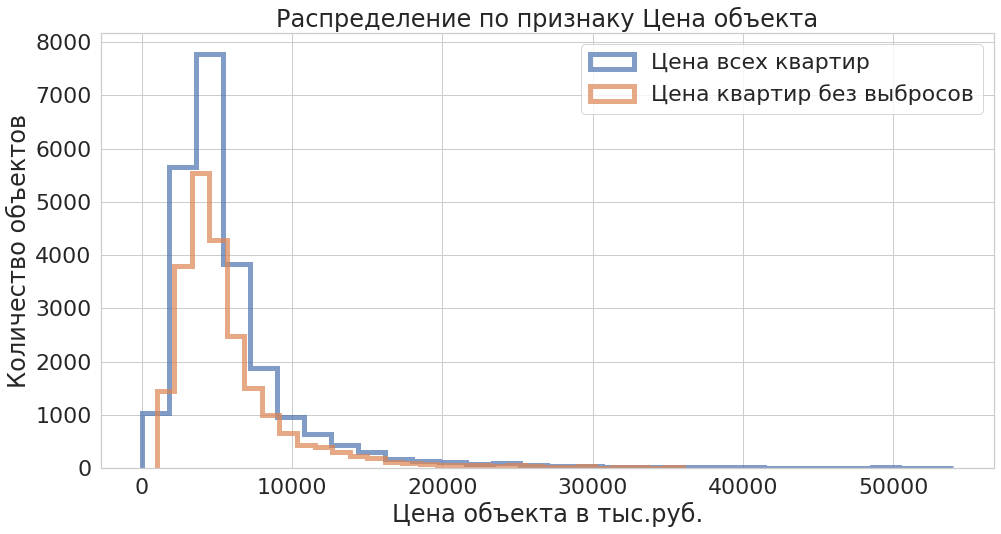

Наибольшие по цене варианты:
12971    763000000.0
14706    401300000.0
1436     330000000.0
15651    300000000.0
22831    289238400.0
Name: last_price, dtype: float64
Наименьшие по цене варианты:
14911    430000.0
17456    430000.0
16274    440000.0
17676    450000.0
5698     450000.0
Name: last_price, dtype: float64


In [110]:
plt.hist(data['last_price']/1000, 
         bins=30, 
         range=(0,(data['last_price']/1000).quantile(q=0.995)),
         histtype='step', 
         alpha=0.7, 
         linewidth=5, 
         label='Цена всех квартир')
plt.hist(outliers_cut('last_price')/1000, 
         bins=30, 
         histtype='step', 
         alpha=0.7, 
         linewidth=5, 
         label='Цена квартир без выбросов')
plt.title('Распределение по признаку Цена объекта')
plt.xlabel('Цена объекта в тыс.руб.')
plt.ylabel('Количество объектов')
plt.legend(loc='upper right')
plt.show()
print('Наибольшие по цене варианты:')
print(data['last_price'].sort_values(ascending=False).head())
print('Наименьшие по цене варианты:')
print(data['last_price'].sort_values().head())

**Выводы**

Цены объектов, представленных в нашем датасете колеблются от 430 тыс.р. до 763 тыс.р., что, однако, является аномальным значением и не характеризует рынок в целом.

Подавляющее большинство квартир имеют цены в диапазоне от 1 до 36 млн.р.

Самыми распространенными являются квартиры со стоимостью 4,5 - 4,6 млн.р.

Количество объектов, цена которых превышает 15 млн.р. крайне невелико, пользуется спросом сегмент до 10 млн.р.

#### Параметр "Количество комнат".

rooms
нижняя граница выбросов 1.0
верхняя граница выбросов 5.0
самое частое значение 0    1
dtype: int64
медианное значение 2.0


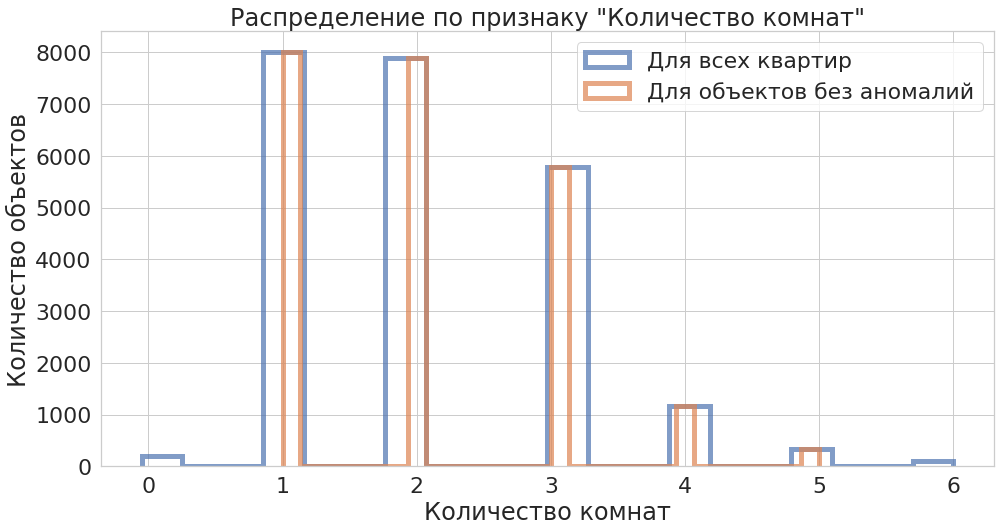

Наибольшие по параметру Количество комнат варианты:
14498    19
18848    16
20829    14
866      14
9688     11
Name: rooms, dtype: int64
Наименьшие по параметру Количество комнат варианты:
1260     0
13613    0
8886     0
19917    0
16093    0
Name: rooms, dtype: int64


In [111]:
plot_graph('Количество комнат', 'rooms')

In [112]:
# рассчитаем долю объектов недвижимости с количеством комнат больше 5

data.query('rooms > 5').shape[0] / data.shape[0] * 100

0.8148368204388236

**Выводы**

На рынке представлены объекты недвижимости с количеством комнат вплоть до 19, однако, все квартиры с количеством комнат свыше 5 можно считать выбросами, т.к. они представлены очень скудно и являются исключением из общего тренда.


Самыми часто приобретаемыми квартирами являются однокомнатные и двухкомнатные (эту закономерность мы увидели и на прошлых этапах при оценке общей и жилой площади).


Заметен устойчивый спрос и на 3-комнатные квартиры. 
Примерно в полутора тысячах объявлений (около 6% от всех данных) фигурируют 4 и 5-комнатные варианты. 

Все остальные варианты мало распространены и представляют собой 0,8 % от общего числа объявлений.

#### Параметр "Высота потолков".

ceiling_height
нижняя граница выбросов 2.5
верхняя граница выбросов 3.6
самое частое значение 0    2.65
dtype: float64
медианное значение 2.65


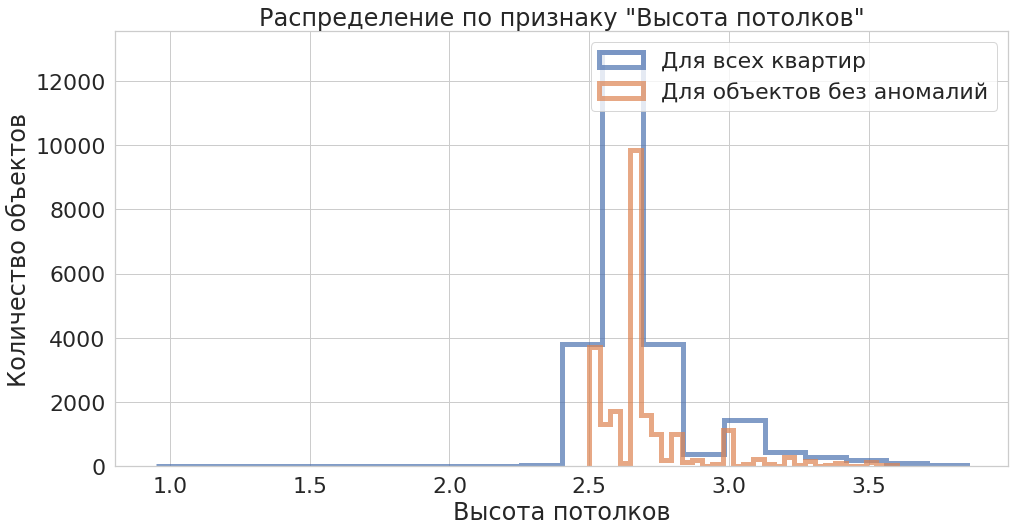

Наибольшие по параметру Высота потолков варианты:
22309    10.3
22869    10.0
5863      8.3
15743     8.0
3474      8.0
Name: ceiling_height, dtype: float64
Наименьшие по параметру Высота потолков варианты:
22590    1.00
5712     1.20
15061    1.40
16934    1.75
11352    2.00
Name: ceiling_height, dtype: float64


In [113]:
plot_graph('Высота потолков', 'ceiling_height')

**Выводы**

Несмотря на наличие выбросов и в этом столбце, высота потолков в квартире - это наименее вариативный из ее габаритных параметров.

Высота потолков в объектах колеблется в пределах от 2,5 - 3,6 метра, с самым распространенным показателем в 2,65 м.

#### Параметр "Этаж квартиры".

floor
нижняя граница выбросов 1.0
верхняя граница выбросов 23.0
самое частое значение 0    2
dtype: int64
медианное значение 4.0


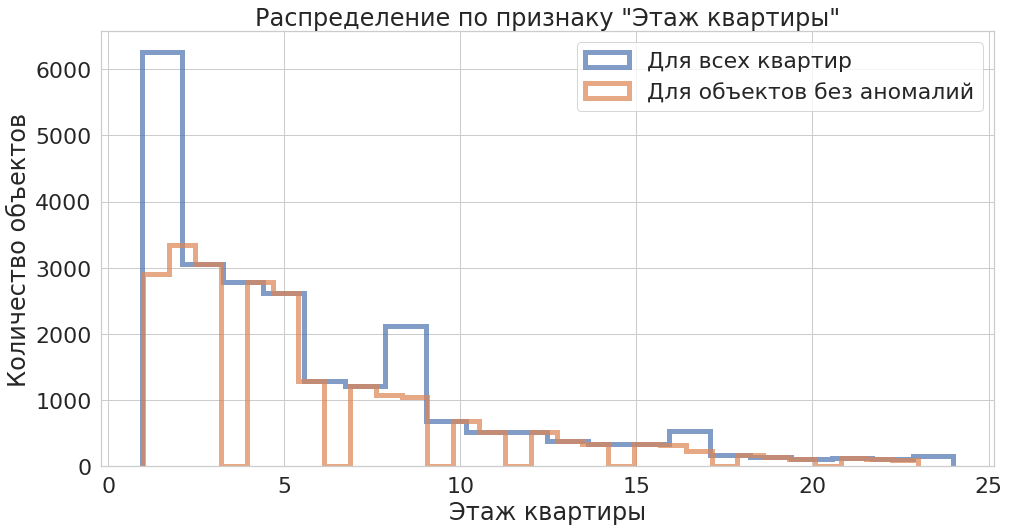

Наибольшие по параметру Этаж квартиры варианты:
18218    33
11575    32
18629    31
1917     30
11079    29
Name: floor, dtype: int64
Наименьшие по параметру Этаж квартиры варианты:
23698    1
3127     1
13585    1
13579    1
13576    1
Name: floor, dtype: int64


In [114]:
plot_graph('Этаж квартиры', 'floor')

**Выводы**

На графике заметна устойчивая тенденция к снижению количества объявлений с увеличение этажа, на котором располагается квартира.

Самыми популярными являютс квартиры с 2 по 9 этаж, что неудивительно, так как наибольшее количество домов представлены 5и и 9-этажными строениями.


Однако, есть варианты и для любителей поселиться повыше: на рынке представлено около полутора тысяч объявлений с квартирами на 10 - 17 этажах.

#### Параметр "Тип этажа квартиры".

<AxesSubplot:ylabel='floor_category'>

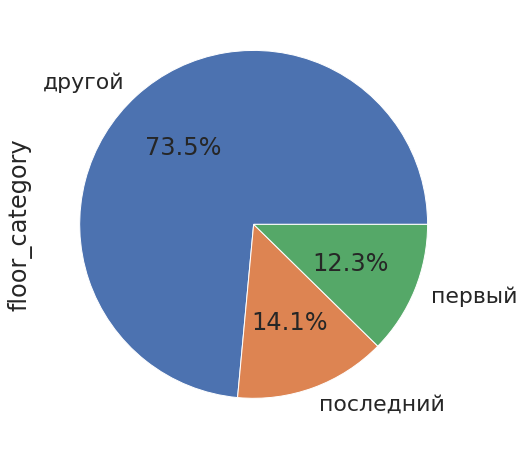

In [115]:
data['floor_category'].value_counts().plot(kind='pie', autopct='%1.1f%%')

**Выводы**

Квартиры на первом этаже составляют 12,3% от всей недвижимости, представленной в наших данных. На последнем этаже находится 14,1% квартир.

Подавляющее большинство квартир, выставляемых на продажу (73,5%) находятся на прочих этажах.

#### Параметр "Общее количество этажей в доме".

floors_total
нижняя граница выбросов 2.0
верхняя граница выбросов 26.0
самое частое значение 0    5
dtype: int64
медианное значение 9.0


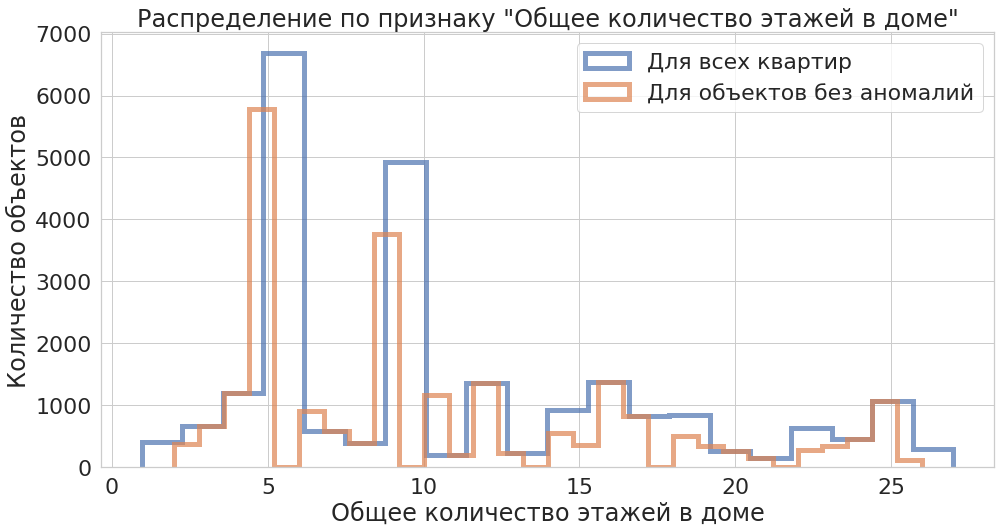

Наибольшие по параметру Общее количество этажей в доме варианты:
2253     60
16731    52
16934    37
5807     36
11079    36
Name: floors_total, dtype: int64
Наименьшие по параметру Общее количество этажей в доме варианты:
19590    1
9752     1
5787     1
9517     1
17744    1
Name: floors_total, dtype: int64


In [116]:
plot_graph('Общее количество этажей в доме', 'floors_total')

**Выводы**

Как мы и предполагали ранее, самыми часто встречающимися являются 5-этажки, за ними следуют 9-этажные строения.

Также заметны пики в районе 12, 16 и 24 этажей.

#### Параметр "Расстояние до центра города в метрах".

city_centers_nearest
нижняя граница выбросов 1327.3
верхняя граница выбросов 50072.6
самое частое значение 0    12242.0
dtype: float64
медианное значение 13073.0


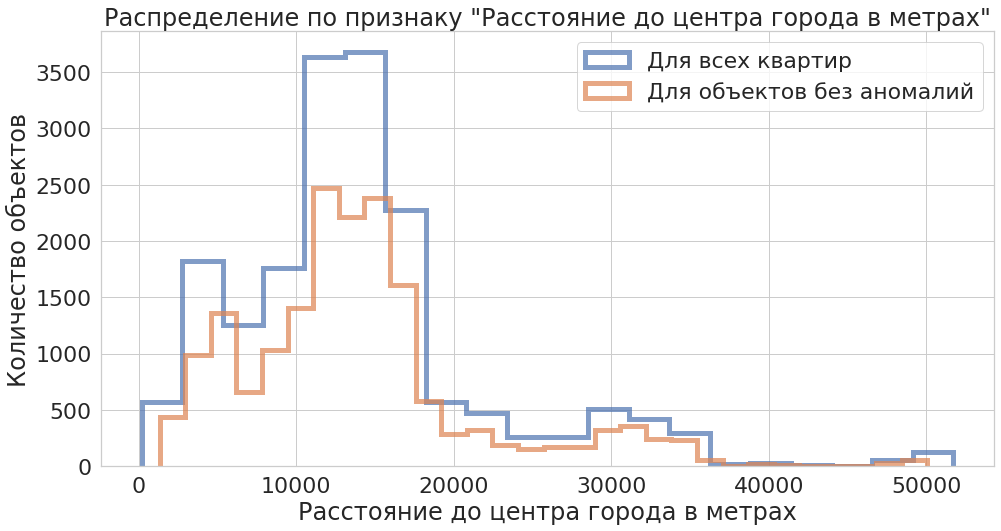

Наибольшие по параметру Расстояние до центра города в метрах варианты:
9640     65968.0
5340     65952.0
577      65764.0
20746    65105.0
5218     64857.0
Name: city_centers_nearest, dtype: float64
Наименьшие по параметру Расстояние до центра города в метрах варианты:
13694    181.0
1182     208.0
8614     215.0
1934     287.0
20873    291.0
Name: city_centers_nearest, dtype: float64


In [117]:
plot_graph('Расстояние до центра города в метрах', 'city_centers_nearest')

**Выводы**

На рынке представлена разная по степени удаленности от центра города недвижимость, размах от 181 метра до 66 километров.

Однако, в среднем, жилье удалено от центра на 12-13  км.

#### Параметр "Расстояние до ближайшего аэропорта".

airports_nearest
нижняя граница выбросов 9523.5
верхняя граница выбросов 58506.5
самое частое значение 0    26763.0
dtype: float64
медианное значение 26763.0


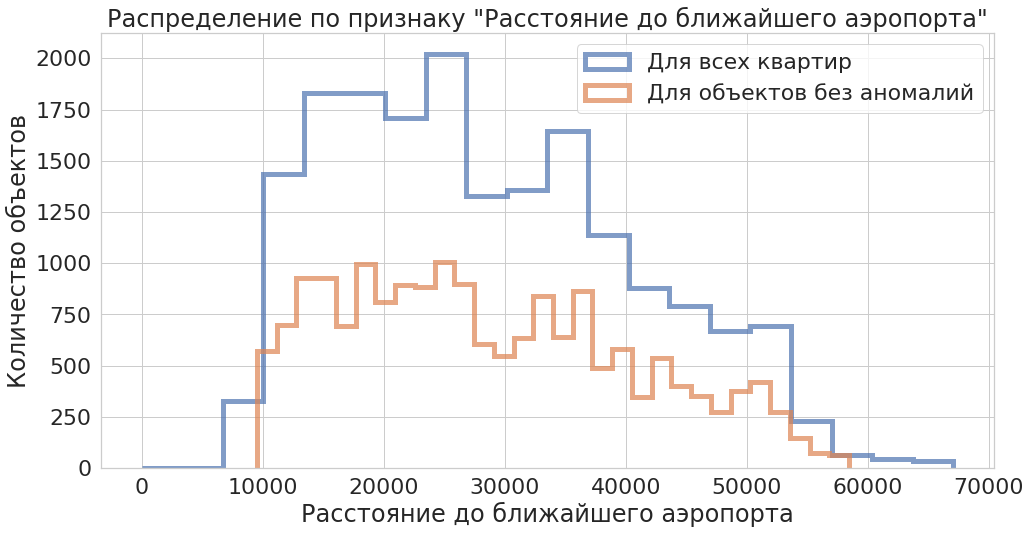

Наибольшие по параметру Расстояние до ближайшего аэропорта варианты:
9640     84869.0
5340     84853.0
577      84665.0
20746    84006.0
5218     83758.0
Name: airports_nearest, dtype: float64
Наименьшие по параметру Расстояние до ближайшего аэропорта варианты:
21085       0.0
4017     6450.0
12899    6450.0
7778     6914.0
23150    6949.0
Name: airports_nearest, dtype: float64


In [118]:
plot_graph('Расстояние до ближайшего аэропорта', 'airports_nearest')

**Выводы**

График удаленности объектов недвижимости от аэропорта не имеет сильно выраженных пиков.

Сильный разброс значений от 6,5 до 85 км, по всей видимости, связан с большим разнообразием населенных пунктов в датасете. В среднем, объекты удалены от аэропорта на 26,7 км.

Не стоит забывать, что около 5 тысяч пропусков в этой колонке нам так и не удалось заполнить. Возможно, они бы сильно изменили общую картину.


#### Параметр "Расстояние до ближайшего парка".

parks_nearest
нижняя граница выбросов 46.0
верхняя граница выбросов 1481.0
самое частое значение 0    460.0
dtype: float64
медианное значение 460.0


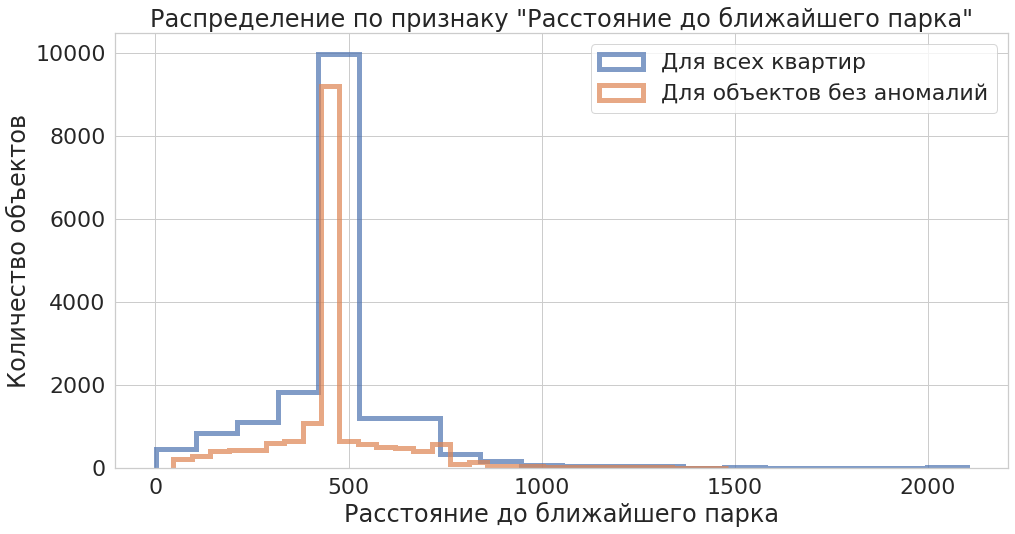

Наибольшие по параметру Расстояние до ближайшего парка варианты:
10959    3190.0
19430    3190.0
1590     3064.0
19208    3013.0
23080    2984.0
Name: parks_nearest, dtype: float64
Наименьшие по параметру Расстояние до ближайшего парка варианты:
14624    1.0
11949    3.0
22941    4.0
9344     7.0
2527     9.0
Name: parks_nearest, dtype: float64


In [119]:
plot_graph('Расстояние до ближайшего парка', 'parks_nearest')

**Выводы**

Для тех квартир, где расстояние до ближайшего парка было указано, выявлено, что в среднем объекты недвижимости находятся на расстоянии 460 метров до ближайшего парка.

Остальные объекты распределены равномерно в обе стороны относительо этого пика с размахом значений от 46 до 1000 м. 

Небольшое количество объектов имеет удаленность от парка порядка 1000-1500 метров.

#### Параметр "День, месяц, год публикации объявления".

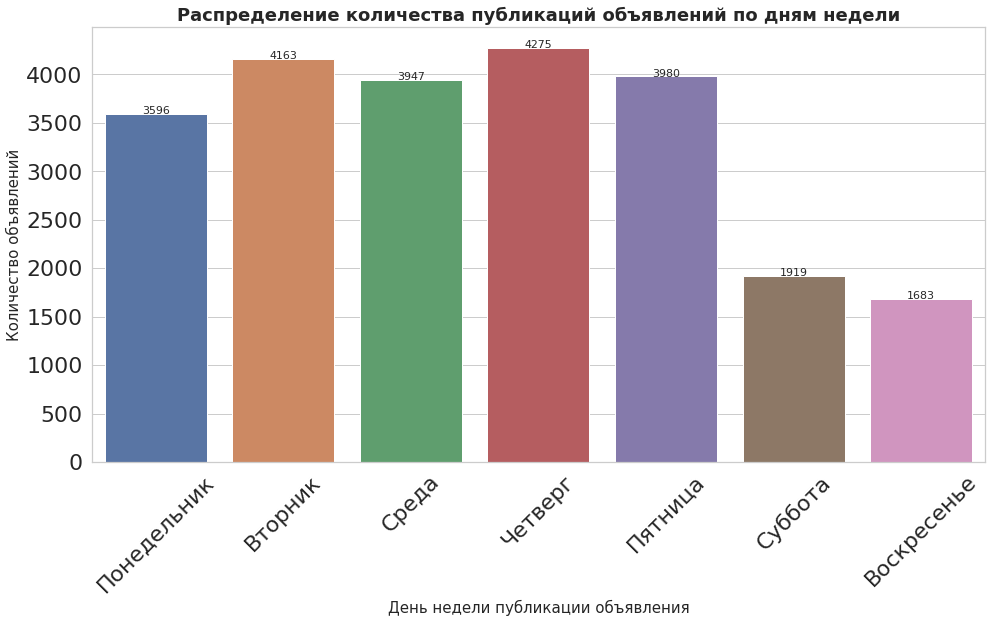

In [120]:
day_order = ['Понедельник','Вторник','Среда','Четверг','Пятница','Суббота','Воскресенье']

ax = sns.countplot(data=data, x='weekday_exposition')
ax.set_title('Распределение количества публикаций объявлений по дням недели', fontsize = 18, fontweight='bold')
ax.set_xlabel('День недели публикации объявления', fontsize = 15)
ax.set_ylabel('Количество объявлений', fontsize = 15)
ax.set_xticklabels(day_order, rotation=45)
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height()+ 0.75, rect.get_height(), horizontalalignment='center', fontsize = 11)

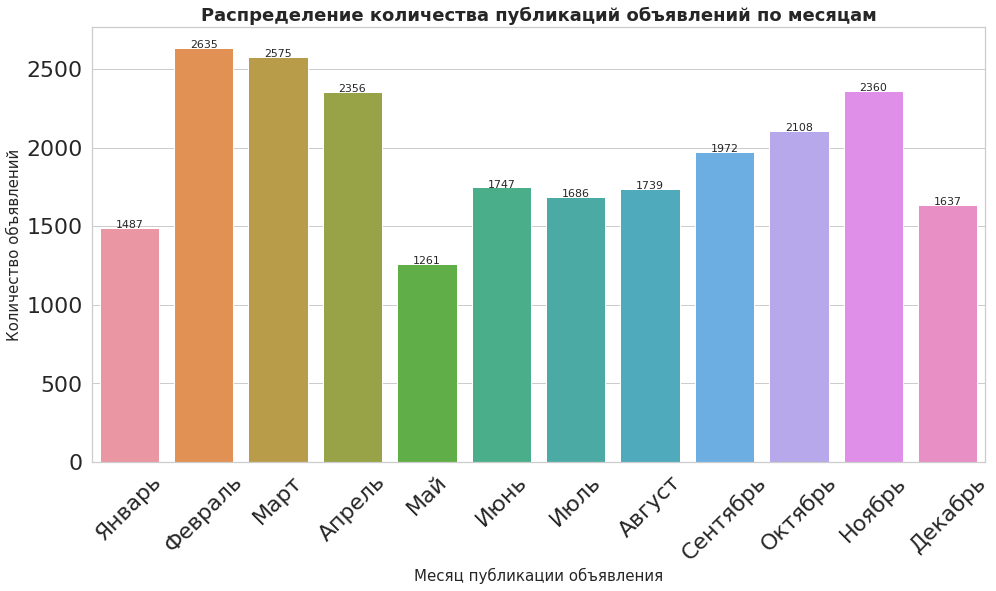

In [121]:
month_order = ['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь']

ax = sns.countplot(data=data, x='month_exposition')
ax.set_title('Распределение количества публикаций объявлений по месяцам', fontsize = 18, fontweight='bold')
ax.set_xlabel('Месяц публикации объявления', fontsize = 15)
ax.set_ylabel('Количество объявлений', fontsize = 15)
ax.set_xticklabels(month_order, rotation=45)
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height()+ 0.75, rect.get_height(),horizontalalignment='center', fontsize = 11)

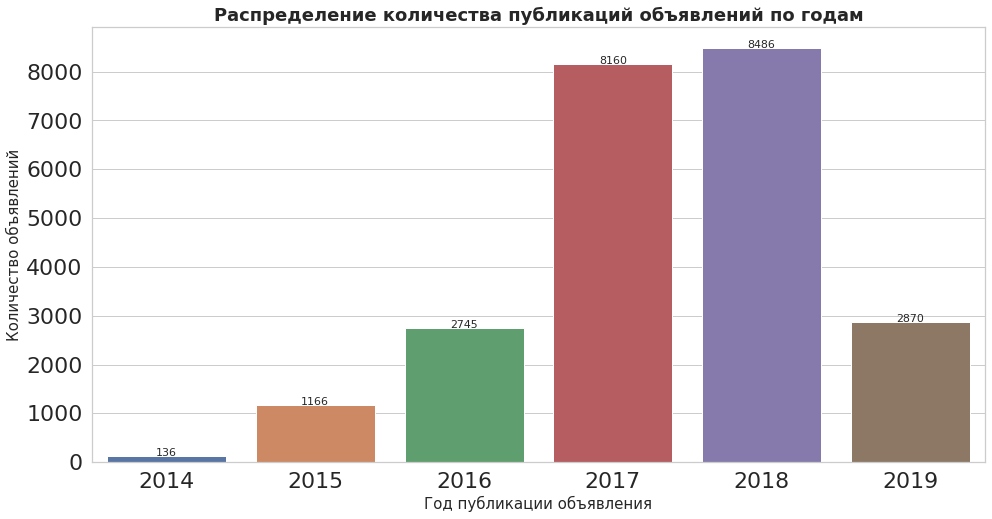

In [122]:
ax = sns.countplot(data=data, x='year_exposition')
ax.set_title('Распределение количества публикаций объявлений по годам', fontsize = 18, fontweight='bold')
ax.set_xlabel('Год публикации объявления', fontsize = 15)
ax.set_ylabel('Количество объявлений', fontsize = 15)
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height()+ 0.75, rect.get_height(),horizontalalignment='center', fontsize = 11)

**Выводы**

Больше всего объявлений размещалось по вторникам и четвергам (более 4 тысяч), меньше всего - в выходные дни (менее 2 тысяч).

Самыми пиковыми месяцами по подаче объявлений о продаже квартир являются февраль, март, апрель и ноябрь.
Таким образом, прослеживается чёткая сезонность: 

- январь с обилием праздников характеризуется сравнительно низкой заинтересованностью  в подаче объявлений,
- в феврале рынок "оживает" и высокий сезон продолжается вплоть до апреля,
- май характеризуется самым сильным падением заинтересованности из-за праздников и знаменует собой начало сезона отпусков, во время которого многие люди обычно предпочитают не занимать продажей/покупкой недвижимости,
- тренд на увеличение количества публикаций начинается в августе и нарастает вплоть до пика в ноябре, 
- декабрьский спад ожидаемо связан с завершением года и, как следствие, всех начинаний, дабы не попасть в новогодние каникулы.

В разрезе по годам подачи объявлений наблюдаются пики в 2017 и 2018 годах. 


Малое количество объявлений в 2014м году связано с тем, что наша выгрузка начинается с конца года, с 27 ноября, то есть в сттистику попал декабрь, характеризующийся сильным снижением интереса к сделкам с недвижимостью.


Сравнительно небольшое количество объявлений в 2019м году также связано с диапазоном выгрузки данных, максимальное значение по столбцу `'first_day_exposition'` 3 мая, то есть мы можем наблюдать количество объявлений только за первые 4 месяца года.

### Изучение скорости продажи квартир

In [123]:
data['days_exposition'].describe()

count    23563.000000
mean       185.770403
std        233.499580
min          0.000000
25%         43.000000
50%         94.000000
75%        237.000000
max       1618.000000
Name: days_exposition, dtype: float64

days_exposition
нижняя граница выбросов 3.0
верхняя граница выбросов 1134.38
самое частое значение 0    45
dtype: int64
медианное значение 94.0


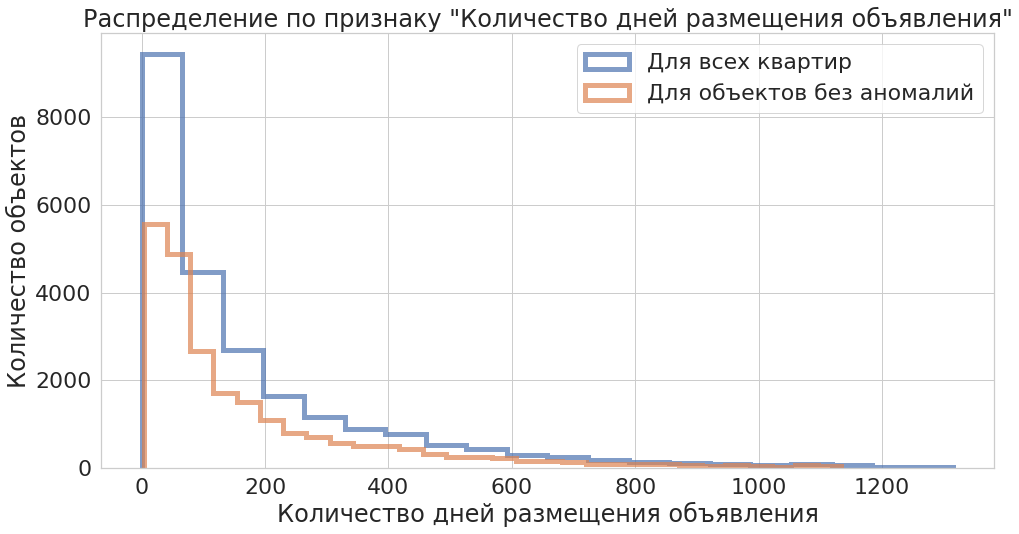

Наибольшие по параметру Количество дней размещения объявления варианты:
3291     1618
15857    1618
3873     1618
6922     1607
3056     1606
Name: days_exposition, dtype: int64
Наименьшие по параметру Количество дней размещения объявления варианты:
10917    0
14246    0
3254     0
15072    0
5986     0
Name: days_exposition, dtype: int64


In [124]:
plot_graph('Количество дней размещения объявления', 'days_exposition')

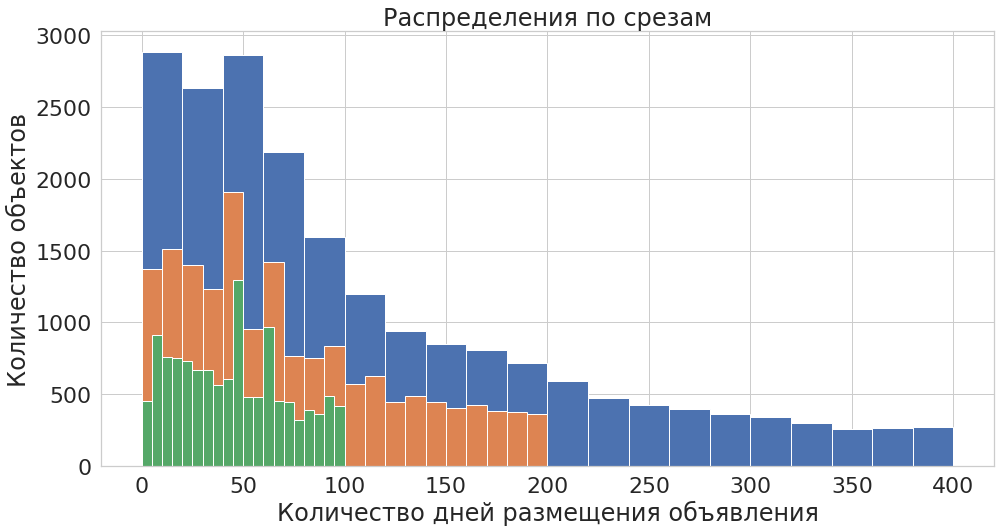

In [125]:
# общая гистограмма по срезу времени продажи до 400 дней:
data['days_exposition'].hist(bins=20, range=(0, 400))
# общая гистограмма по срезу времени продажи до 200 дней:
data['days_exposition'].hist(bins=20, range=(0, 200))
data['days_exposition'].hist(bins=20, range=(0, 100))
plt.title('Распределения по срезам')
plt.xlabel('Количество дней размещения объявления')
plt.ylabel('Количество объектов');

**Выводы**

Общее время продажи жилой недвижимости - до 1618 дней. Пик в 0, вероятно, вызван реакцией системы на отзыв объявления в течение первых суток с момента его подачи, что не является актом продажи, а скорее всего связано с особенностями аггрегатора объявлений.

На графике видно 2 пиковых значения по количеству дней размещения на 45й и 60й день. Эти значения связаны с особенностями сервиса Яндекс.Недвижимость: объявления о продажах квартир стоимостью до 4,5 млн являются бесплатными в течение 45 дней, а стоимостью от 4,5 до 10 млн — в течение 60 дней. Далее происходит автоматическое снятие объявления, если услуги размещения не были оплачены.

При этом можно увидеть, что половина всех квартир продается в течение 95 дней с момента подачи объявления.

Исходя из расчета выбросов можно сказать, что продажи прошли очень быстро, если сделки были оформлены в период до 3-5 дней (еще одно пиковое значение, которое видно на графике) и слишком долго, если до оформления сделки прошло 1134 дня (99й процентиль по всем данным).
Остальные значение являются выбросами.

### Изучение факторов, влияющих на стоимость квартиры

Задача, изучить, зависит ли цена квартиры от:
    
- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).

А также визуализировать и объяснить полученне взаимозависимости.

Для того, чтобы наше исследование факторов, влияющих на стоимость жилья, было объективным, а выявленные закономерности носили максимально обобщающий характер, мы должны провести его на основе очищенных от выбросов данных, чтобы они не вносили погрешностей в оценку.

Для этого ранее была написана функция df_without_outliers, с помощью которой мы последовательно пройдем по интересующим нас колонкам, содержащим выбросы, и отберем только "чистые данные".

In [126]:
columns_with_outlayers = ['total_area', 'living_area', 'kitchen_area', 'last_price', 'rooms', 'ceiling_height', 'floors_total', 'floor', 'balcony', 'days_exposition']

#задаем датафрейм для последующих фильтраций:
data_normal = data.copy()

for column in columns_with_outlayers:
    #отсекаем выбросы и сохраняем срез в переменную data_normal:
    data_normal = df_without_outliers(data_normal, column)

total_area
доля выбросов 2.0
число строк нового датафрейма 23092
living_area
доля выбросов 1.94
число строк нового датафрейма 22645
kitchen_area
доля выбросов 1.85
число строк нового датафрейма 22226
last_price
доля выбросов 1.97
число строк нового датафрейма 21789
rooms
доля выбросов 0.88
число строк нового датафрейма 21598
ceiling_height
доля выбросов 1.14
число строк нового датафрейма 21351
floors_total
доля выбросов 1.01
число строк нового датафрейма 21136
floor
доля выбросов 0.8
число строк нового датафрейма 20966
balcony
доля выбросов 0.0
число строк нового датафрейма 20966
days_exposition
доля выбросов 1.26
число строк нового датафрейма 20702


In [127]:
data_normal

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_sq_meter,weekday_exposition,month_exposition,year_exposition,floor_category,city_center_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2.0,755.0,57,120370.37,3,3,2019,другой,16.03
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.6,1,False,...,NaN,0.0,584.5,81,82920.79,1,12,2018,первый,18.60
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.3,4,False,...,90.0,2.0,574.0,558,92785.71,3,8,2015,другой,13.93
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.4,5,False,...,NaN,NaN,NaN,55,95065.79,0,9,2018,другой,NaN
7,5,7915000.0,71.60,2019-04-18,2,2.65,24,30.5,22,False,...,460.0,0.0,504.0,15,110544.69,3,4,2019,другой,11.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23692,2,1350000.0,30.00,2017-07-07,1,2.65,5,17.5,4,False,...,NaN,NaN,NaN,413,45000.00,4,7,2017,другой,NaN
23693,9,4600000.0,62.40,2016-08-05,3,2.60,9,40.0,8,False,...,352.0,1.0,675.0,239,73717.95,4,8,2016,другой,34.10
23695,14,3100000.0,59.00,2018-01-15,3,2.65,5,38.0,4,False,...,NaN,NaN,NaN,45,52542.37,0,1,2018,другой,NaN
23696,18,2500000.0,56.70,2018-02-11,2,2.65,3,29.7,1,False,...,NaN,NaN,NaN,446,44091.71,6,2,2018,первый,NaN


Финальный датафрейм для анализа зависимостей в данных содержит 20702 записи и 27 колонок.

Построим матрицу коэффициентов корреляции, чтобы бегло оценить наличие связей.

In [128]:
data_normal[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms', 'floor', 'floor_category']].corr()

,last_price,total_area,living_area,kitchen_area,rooms,floor
last_price,1.000000,0.757217,0.612347,0.537359,0.448154,0.123457
total_area,0.757217,1.000000,0.901659,0.504176,0.772749,0.003622
living_area,0.612347,0.901659,1.000000,0.255938,0.888972,-0.101255
kitchen_area,0.537359,0.504176,0.255938,1.000000,0.116374,0.206037
rooms,0.448154,0.772749,0.888972,0.116374,1.000000,-0.147279
floor,0.123457,0.003622,-0.101255,0.206037,-0.147279,1.000000


[Text(0.5, 0, 'общая площадь'), Text(0, 0.5, 'окончательная цена')]

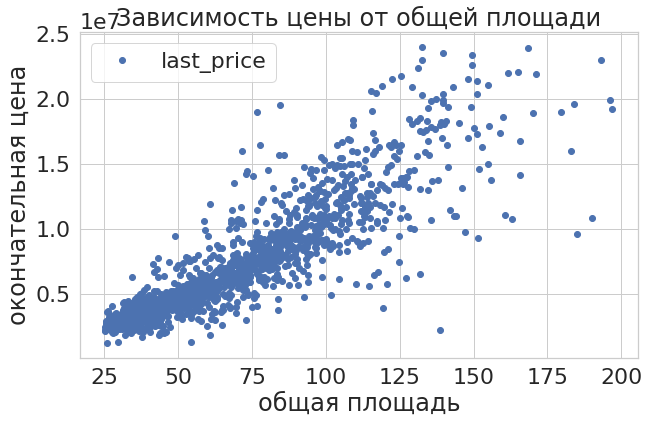

In [129]:
# Зависимость цены от общей площади

(
    data_normal.pivot_table(index='total_area', values='last_price')
    .plot(grid=True, style='o', figsize=(10, 6), title='Зависимость цены от общей площади').set(
                       xlabel='общая площадь', ylabel='окончательная цена')
)

[Text(0.5, 0, 'площадь кухни'), Text(0, 0.5, 'окончательная цена')]

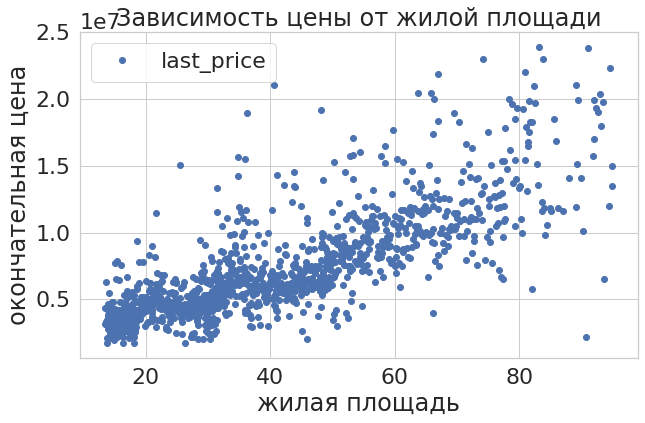

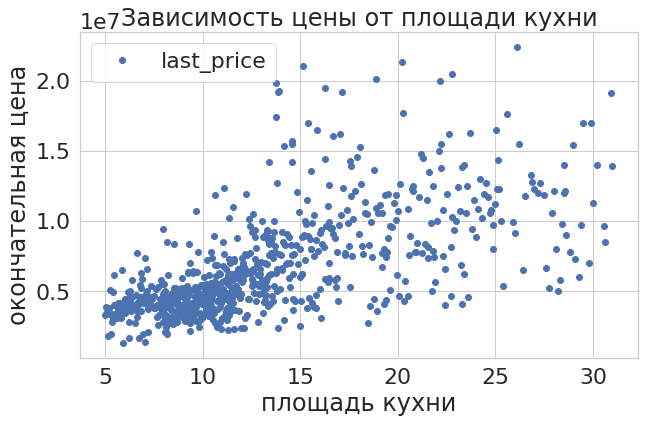

In [130]:
# Зависимость цены от  жилой площади
(
    data_normal.pivot_table(index='living_area', values='last_price')
    .plot(grid=True, style='o', figsize=(10, 6), title='Зависимость цены от жилой площади').set(
                       xlabel='жилая площадь', ylabel='окончательная цена')
)


# Зависимость цены от площади кухни
(
    data_normal.pivot_table(index='kitchen_area', values='last_price')
    .plot(grid=True, style='o', figsize=(10, 6), title='Зависимость цены от площади кухни').set(
                       xlabel='площадь кухни', ylabel='окончательная цена')
)

**Вывод**

Корреляция между ценой недвижимости и показателями общей, жилой площади, размером кухни очень высока - 0.75, 0.61 и 0.53 соответственно, зависимость положительная.
Таким образом, чем больше площадь, тем выше стоимость. 

Как видно из диаграммы, зависимость цены от площади квартиры примерно до 125 кв.м. носит выраженный характер, а после этого порога линия тренда размывается, так как предложений с такой площадью немного и на их цену начинают сильнее влиять и прочие факторы.

Подобную же картину можно наблюдать на показателях жилой площади до 60-70 метров и площади кухни до 12-15 метров.

Наибольшее количество точек на графиках зависимости цены квартиры от площади сосредоточено до этих пороговых значений, то есть корреляци хорошо прослеживается на самых распространенных вариантах, представленных в объявлениях. 

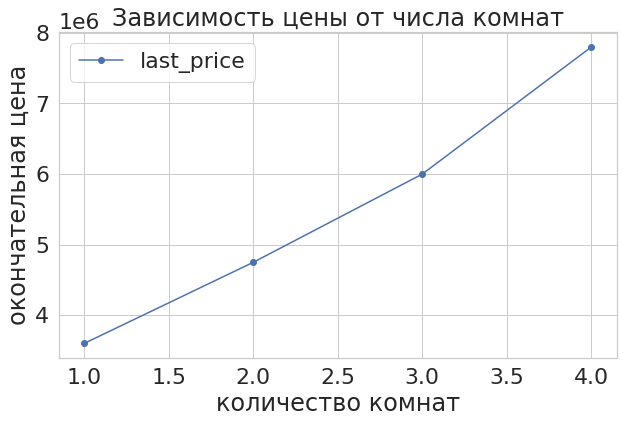

In [131]:
# Зависимость цены от числа комнат

data_normal.pivot_table(index='rooms', values='last_price', aggfunc='median').reset_index().plot(
                        x='rooms', y='last_price', grid=True, style='o-', figsize=(10, 6)).set(
                        title='Зависимость цены от числа комнат', 
                        xlabel='количество комнат', ylabel='окончательная цена');

**Вывод**

График подтверждает логическое предположение о том, что чем больше в квартире комнат, тем она дороже.
При этом коэффициент корреляции меньше, чем между ценой квартиры и площадью и составляет 0.44.


Это может быть связано с тем, что бывают квартиры с 1-2 большими по площади комнатами, и таким образом, значение площади превалирует. 
Или же на цену квартир с одинаковым количеством комнат могут влиять некие третие факторы (например, квартиры в центре состоят из малого числа комнат, но стоят дороже).

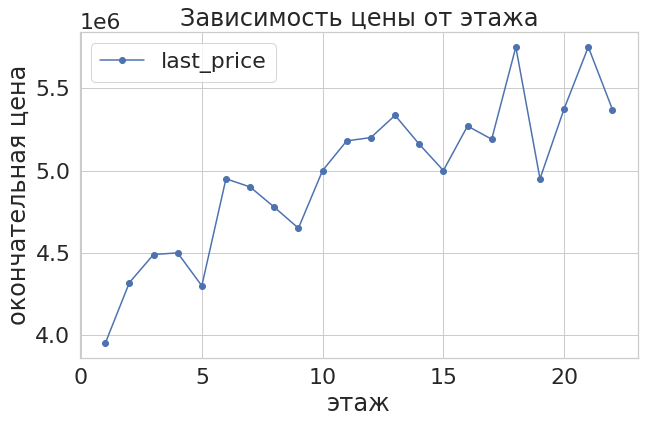

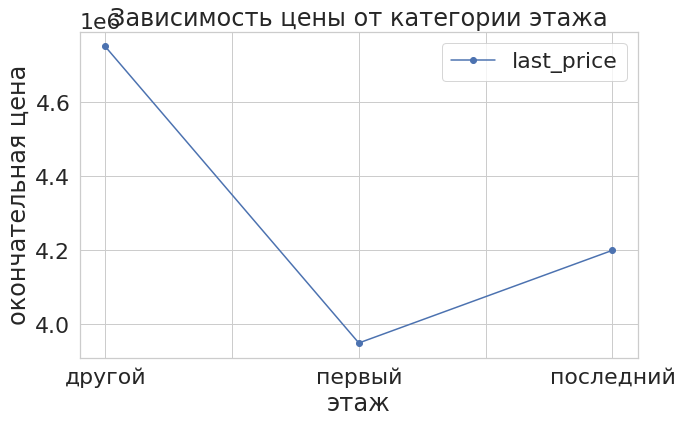

In [132]:
# Зависимость цены от этажа

data_normal.pivot_table(index='floor', values='last_price', aggfunc='median').reset_index().plot(
                        x='floor', y='last_price', grid=True, style='o-', figsize=(10, 6)).set(
                        title='Зависимость цены от этажа', 
                        xlabel='этаж', ylabel='окончательная цена')

# Зависимость цены от категории этажа

data_normal.pivot_table(index='floor_category', values='last_price', aggfunc='median').reset_index().plot(
                        x='floor_category', y='last_price', grid=True, style='o-', figsize=(10, 6)).set(
                        title='Зависимость цены от категории этажа', 
                        xlabel='этаж', ylabel='окончательная цена');

**Вывод**

Эти два графика стоит рассматривать вместе, так как они хорошо взаимодополняют друг друга.

Самая низкая цена - у квартир на 1 этаже, последний этаж также "проседает" в стоимости. Соответственно, наибольшие цены показывает недвижимость не на первом и не на последнем этаже. Причем разница может быть достаточно существенной, до 800 т.р.

На графике зависимости цены от конкретного этажа эту тенденцию можно проследить по характерным участкам нарастания и резкого падения цены: от 1 этажа к 5, от 5 к 9, от 9 к 15, от 15 к 19 этажу и тд. 

    
То есть внутри каждого такого отрезка цена плавно нарастает, но затем резко падает, если квартира находится на последнем этаже (5, 9, 15, 19).


Наивысшие цены показывают квартиры на 3-4, 6, 13, 16, 18, 21 этажах, то есть в срединном сегменте по общей этажности дома.

Однако, корреляция между ценой квартиры и этажом, на котором она находится, наименьшая из рассматриваемых нами параметров и составляет всего 0.12.

In [133]:
data_normal[['last_price', 'weekday_exposition', 'month_exposition', 'year_exposition']].corr()

,last_price,weekday_exposition,month_exposition,year_exposition
last_price,1.000000,-0.012976,0.003742,0.005565
weekday_exposition,-0.012976,1.000000,0.012939,-0.002171
month_exposition,0.003742,0.012939,1.000000,-0.277329
year_exposition,0.005565,-0.002171,-0.277329,1.000000


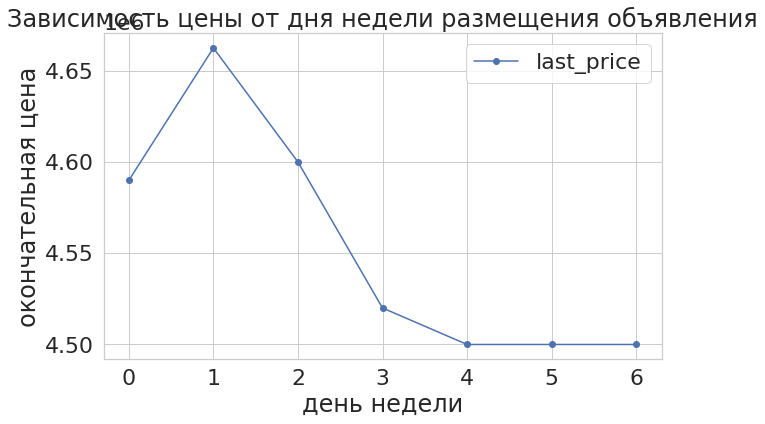

In [134]:
data_normal.pivot_table(index='weekday_exposition', values='last_price', aggfunc='median').reset_index().plot(
                      x='weekday_exposition', y='last_price', grid=True, style='o-', figsize=(10, 6)).set(
                      title='Зависимость цены от дня недели размещения объявления', 
                      xlabel='день недели', ylabel='окончательная цена');

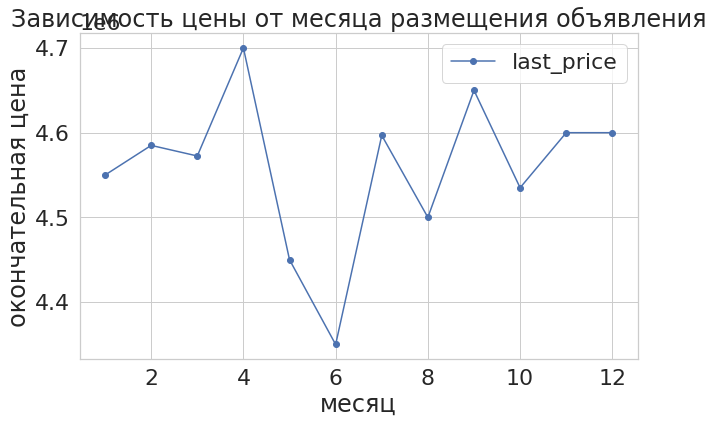

In [135]:
data_normal.pivot_table(index='month_exposition', values='last_price', aggfunc='median').reset_index().plot(
                      x='month_exposition', y='last_price', grid=True, style='o-', figsize=(10, 6)).set(
                      title='Зависимость цены от месяца размещения объявления', 
                      xlabel='месяц', ylabel='окончательная цена');

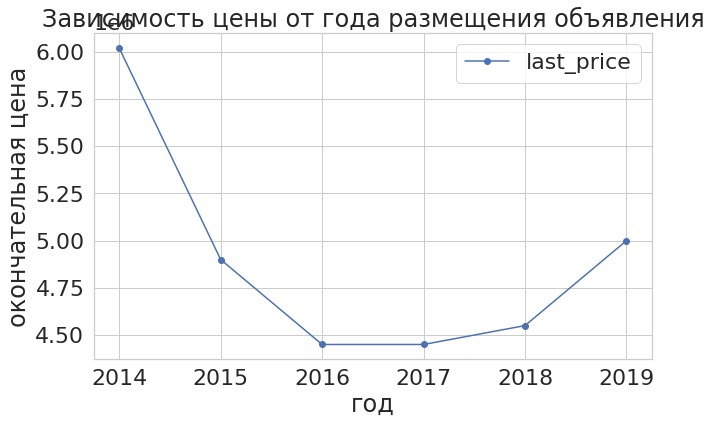

In [136]:
data_normal.pivot_table(index='year_exposition', values='last_price', aggfunc='median').reset_index().plot(
                      x='year_exposition', y='last_price', grid=True, style='o-', figsize=(10, 6)).set(
                      title='Зависимость цены от года размещения объявления', 
                      xlabel='год', ylabel='окончательная цена');

**Вывод**

Корреляция между ценой недвижимости и датой размещения объявления (день недели, месяц, год) очень низкая (0.013, 0.0037, 0.0056), то есть на цену недвижимости ораздо сильнее влияют прочие более важные для конечного потребителя факторы: площадь жилья, количество комнат, этаж, удаленность от центра и тд.
    
    
Также стоит помнить, что корреляция не носит характера каузации, то есть причинно-следственной связи между рассматриваемыми параметрами и ценой в реальности может и не быть, мы лишь наблюдаем совместный рост или падение двух характеристик.         

Судя по полученным графикам:
    
- дороже всего квартиры, опубликованные во вторник, к концу недели (пятница, суббота, воскресенье) начинают выкладывать более дешевые варианты;
- дороже всего квартиры, выставленные на продажу в апреле и сентябре, дешевле всего - майские и июньские варианты;

В разрезе года публикации объявления наши выводы стоит привязать к временному промежутку его создания. Минимальной датой в нем является  27.11.2014, максимальной - 03.05.2019.


Таким образом, по крайним точкам на графике (2014 и 2019 годы) мы не можем делать объективных выводов, так как в конце 2014го года могли выложить несколько очень дорогих вариантов, что и создало сильный пик в начале графика, а за 2019й год у нас просто нет полных данных.


Однако, с 2015 по 2017й год всё равно заметен тренд на снижение цен квартир, который начал меняться в сторону повышения в 2018м и, даже учитывая неполные данные, очевидно продолжится в 2019м.

### Сравнение средней стоимости одного квадратного метра в топ-10 населённых пунктов

In [137]:
# выберем 10 населеннх пунктов с наибольшим числом объявлений
top_ten = data['locality_name'].value_counts().head(10)

# сводная таблица с ценами за 1 кв.м. по населённым пунктам 
top_ten_sm_price = data.query('locality_name in (@top_ten.index)').pivot_table(values='price_sq_meter', index='locality_name', aggfunc='median').astype(int)

# отсортируем полученную таблицу по убыванию цены за квадратный метр
top_ten_sm_price.sort_values('price_sq_meter', ascending=False)

,price_sq_meter
locality_name,
Санкт-Петербург,104774
Пушкин,100000
деревня Кудрово,91860
поселок Парголово,91642
поселок Мурино,86059
поселок Шушары,76829
Колпино,74723
Гатчина,67796
Всеволожск,65789


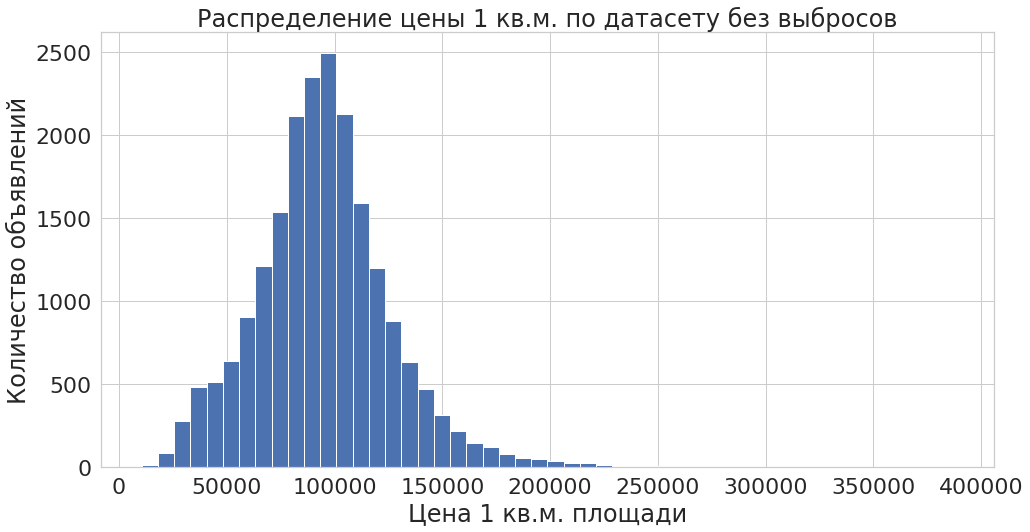

In [164]:
data_normal['price_sq_meter'].hist(bins=50).set(xlabel='Цена 1 кв.м. площади',
                                                ylabel='Количество объявлений', 
                                                title='Распределение цены 1 кв.м. по датасету без выбросов');

**Выводы**

- Наибольшая средняя стоимость квадратного метра, как и ожидалось, в Санкт-Петербурге, 104,7 тыс.р.
- Затем идёт Пушкин, что, вероятно, вызвано хорошей застройкой и большим количеством парков. 
- Затем идут районы, фактически являющиеся Санкт-Петербургом и непосредственно к нему примыкающие - Кудрово, Мурино, Шушары. 
- Из топ-10 наименьшая стоимость квадратного метра в Гатчине, Всеволожске и Выборге, что, вероятно, связано с удаленностью от административного центра и, как следствие, более низкой конкуренцией на строительном рынке и меньшим спросом покупателей на жилье в этих городах.

### Влияние расстояния до центра города на стоимость объектов недвижимости

Ранее было рассчитано расстояние до центра в километрах. 

Задачи:

- выделить квартиры в Санкт-Петербурге с помощью столбца `'locality_name'`,
- вычислить среднюю цену каждого километра,
- сделать выводы о том, как стоимость объектов зависит от расстояния до центра города.

In [139]:
# выборка недвижимости в Санкт-Петербурге
locality_SPB = data.query('locality_name == "Санкт-Петербург"')

# для удобства преобразуем столбец city_center_km в тип int:
locality_SPB['city_center_km'] = (locality_SPB['city_center_km']).astype('int')

In [140]:
locality_SPB[['city_center_km', 'last_price', 'price_sq_meter']].corr()

,city_center_km,last_price,price_sq_meter
city_center_km,1.000000,-0.264281,-0.310370
last_price,-0.264281,1.000000,0.774738
price_sq_meter,-0.310370,0.774738,1.000000


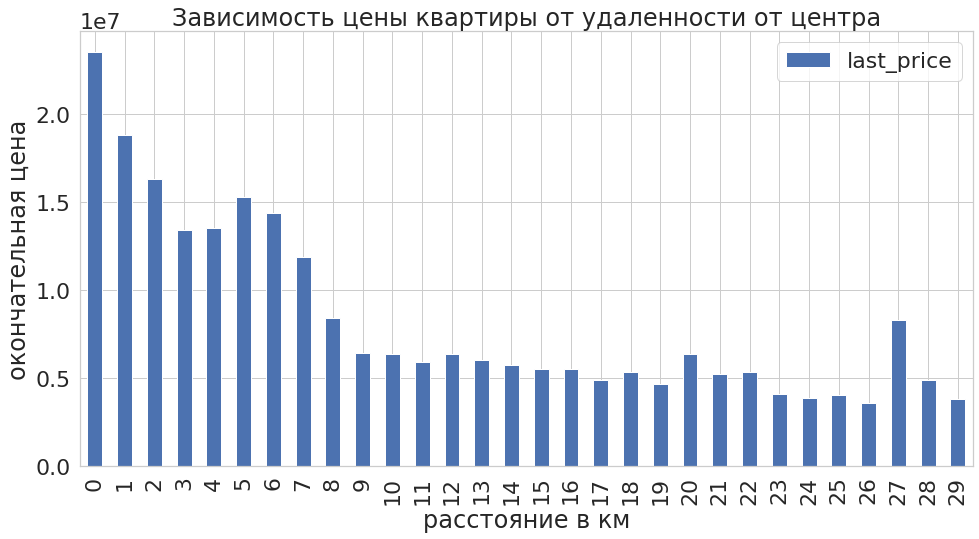

In [141]:
(locality_SPB.pivot_table(index='city_center_km', 
                         values='last_price', aggfunc='mean')
 .reset_index()
 
 .plot(x='city_center_km', y='last_price', kind= 'bar', 
       grid=True,
       title='Зависимость цены квартиры от удаленности от центра')
 .set(
       xlabel='расстояние в км', ylabel='окончательная цена')
);

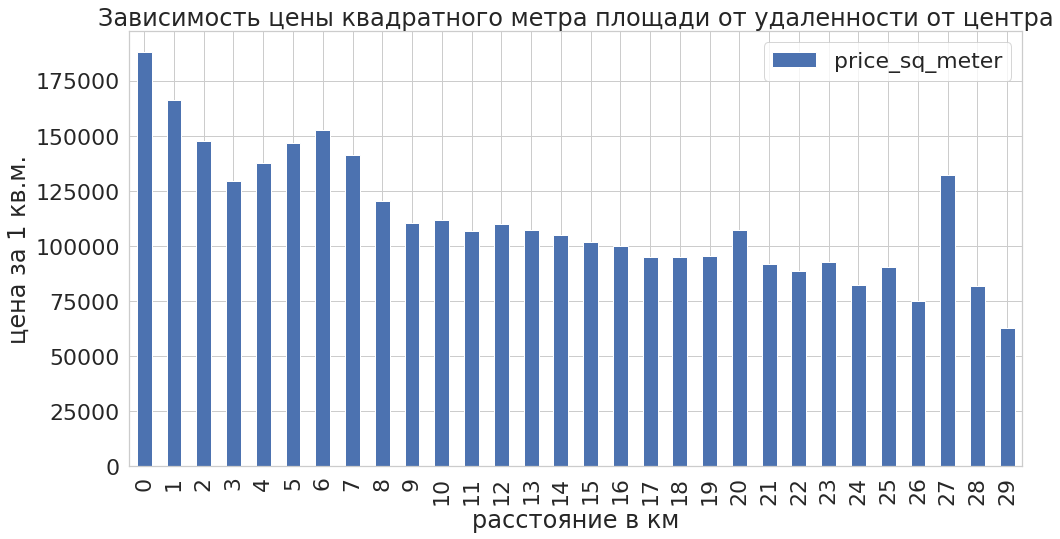

In [142]:
(locality_SPB.pivot_table(index='city_center_km', 
                          values='price_sq_meter', aggfunc='mean')
 .reset_index()
 
 .plot(x='city_center_km', y='price_sq_meter', kind= 'bar', 
       grid=True,
       title='Зависимость цены квадратного метра площади от удаленности от центра')
 .set(
       xlabel='расстояние в км', ylabel='цена за 1 кв.м.')
);

In [143]:
locality_SPB.query('city_center_km == 27')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_sq_meter,weekday_exposition,month_exposition,year_exposition,floor_category,city_center_km
748,13,14350000.0,74.0,2017-11-28,2,3.13,5,30.0,3,False,...,1496.0,0.0,504.0,128,193918.92,1,11,2017,другой,27
5961,6,2250000.0,32.0,2018-02-27,1,2.65,2,16.5,2,False,...,460.0,0.0,504.0,178,70312.50,1,2,2018,последний,27


**Выводы**

В нашем датасете представлены расстояния от 0 до 29 км относительно центра. 

По диаграммам видно, что на расстоянии в пределах 1 км по отношению к центру Санкт-Петербурга средняя цена кв.м. и общая цена объекта недвижимости максимальна.

Далее вплоть до радиуса 3 км до центра стоимость падает и достигает локального минимума. Затем снова следует подъем с пиком в 5-6 км и резкий спад на 8 км.
Таким образом, можно сказать, что центральная зона находится в радиусе до 8 км от центра Санкт-Петербурга.

В центре средняя стоимость квартир доходит до 24 млн.р., а за пределами центральной зоны средняя цена около 6 млн.р.

Также на диаграмме виден выброс средней цены в районе 27 км, связанный с тем, что в этой позиции всего 2 объекта недвижимости и один из них под индексом 748 имеет очень высокую цену.

Таким образом, исследование подтверждает эмпирическую догадку о том, что цена объекта недвижимости и цена 1 квадратного метра площади обратно пропорциональна расстоянию до центра города.

### Выводы по разделу 4

- Рынок жилья в основном представлен квартирами от 25 до 150 кв.м. с пиком в сегменте 30-50 кв.м. и несколько меньшим по количеству объявлений сегменте 50-75 кв.м. 

- Жилая площадь квартир варьируется от 13 до 117 кв.м. с двумя характерными пиками: 18 и 30 кв.м.. Среднестатистический размер площади кухни - от 5 до 20 кв.м., с пиками в 6 и 9 кв.м. 

Таким образом, на рынке жилья преобладают небольшие квартиры эконом-класса с 1-2 комнатами.

- Подавляющее большинство квартир - 1-3 комнатные, с высотой потолков 2,6-2,7 м., однако, встречаются и квартиры с бОльшим количество комнат (вплоть до 7и, остальных вариантов мало и они скорее являются исключениями).

- Цены на квартиры в основном находятся в диапазоне от 1 до 36 млн.руб. Самыми распространенными являются квартиры со стоимостью 4,5 - 5,5 млн.р., но есть и уникальные объекты стоимостью до 763 млн.руб. 

- Стоимость квадратного метра недвижимости варьируется от 58 до 105 тыс.руб. в топ-10 населенных пунктов по количеству объявлений. В целом же, распределение стоимости 1 кв.м. недвижимости напоминает по форме равномерное, самыми распространенными являются значения 80-120 тыс.руб. за 1 кв.м.

- Покупатели предпочитают квартиры НЕ на первом и НЕ на последнем этаже, что сказывается также и на цене таких объетов.

- Максимальное время продажи жилой недвижимости в данном датасете - 1618 дней. Однако, половина квартир продается за период до 95 дней. Пиковые значения по количеству дней размещения на 45й и 60й день связаны с особенностями сервиса Яндекс.Недвижимость и представляют собой выбросы.

- В размещении объявлений наблюдается сезонность недельная и месячная сезонность: больше всего объявлений размещается по вторникам и четвергам , меньше всего - в выходные дни. Самыми пиковыми месяцами являются февраль, март, апрель и ноябрь.

- На цену жилья оказывают влияние такие факторы, как: общая и жилая площадь, площадь кухни, количество комнат, этаж (выше ценятся квартиры на непервом и непоследнем этаже). 

- Город с максимальной средней стоимостью квадратного метра жилья - Санкт-Петербург (104,7 тыс.руб. за кв.м.), с минимальной- Выборг (58 тыс.руб. за кв.м.)

- В пределах Санкт-Петербурга важный вклад в формирование цены за квартиру вносит и расстояние до центра.
Центральная зона Санкт-Петербурга находится в радиусе 8 км от исторического центра города. 

- Средняя цена за 1 кв.м. зависит от удаленности от центра города: в центре она варьируется от 175 до 130 тыс.руб. за кв.м., и далее уменьшается до 105-75 тыс.руб. за кв.м.

- Стоимость квартир в центре свыше 10 миллионов, при удалении за границу 8 километров от центра стоимость падает и составляет около 6-5 млн.руб.

## Общий вывод исследования

Нами были изучены и проанализированы данные, содержащие информацию о квартирах, выставленных на продажу в Санкт-Петербурге и соседних населённых пунктах за период с 27.11.2014 по 03.05.2019. По каждой квартире доступны два вида данных: вписанные самостоятельно пользователями и полученные автоматически на основе картографических данных (расстояние до центра, аэропорта, ближайшего парка и водоёма).

В процессе предварительной обработки данных были выявлены явные и неявные пропуски, выбросы и аномалии, а также неявные дубликаты названий населенных пунктов. 

Скорее всего, пропуски вызваны тем, что данные были взяты из разных источников, некорректно заполнены клиентами или не могут, по тем или иным причинам, быть адекватно оценены и внесены автоматическим способом (картографические данные).

Пропуски были устранены медианными значениями с применением группировки там, где это было возможно. Также аномальные значения были почищены по граничным показателям 1го и 99го процентилей. 

Для дальнейшего анализа были рассчитаны и добавлены отдельными столбцами значения цена одного квадратного метра, день недели, месяц и год публикации объявления, тип этажа квартиры, расстояние до центра города в километрах.

Исследование показало, что на рынке недвижимости представлено жилье эконом и премиум класса с большим разбросом площади и цены. Основной сегмент предложений находится в диапазоне эконом-класса: наибольшим спросом пользуются 1-2 комнатные квартиры небольшой площади 30-75 кв.м. стоимостью от 4 до 6 млн.руб.

Цена квартиры имеет прямую корреляцию с общей и жилой площадью, площадью кухни, количеством комнат и категорией этажа, и имеет обратную корреляцию отноительно расстояния до центра города.

Максимальная стоимость жилья по всему датасету - в Санкт-Петербурге, минимальная - в Выборге.
Наибольшей стоимостью в Санкт-Петербурге обладает недвижимость, находящаяся в радиусе 8 км от центра города. 
С увеличением расстояния цена квадратного метра и общей стоимости квартиры падает.